# DATA SCIENCE ASSIGNMENT

## BAHA ATAKAN ARIKAN, MI4.0

### SUPERVISED LEARNING

Input -> Pre-processing -> Modelling -> Evaluating -> Deploying

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv('C:/Users/ataka/Desktop/Classes/Data Science/Assignment/Human_Resources.csv')

In [245]:
# to check the target variables first
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [246]:
df.shape

(1470, 35)

In [247]:
numCol = df.select_dtypes(include=['number'])
numVar = num_columns.shape[1]
print(f'There are {numVar} numerical variables in the dataset.')

There are 29 numerical variables in the dataset.


In [248]:
catCol = df.select_dtypes(include=['object'])
catVar = cat_columns.shape[1]
print(f'There are {catVar} categorical variables in the dataset.')

There are 6 categorical variables in the dataset.


In [249]:
# to see the types and to check the missing variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Missing Values Ratio
Age,0.0
Attrition,0.0
BusinessTravel,0.0
DailyRate,0.0
Department,0.0
DistanceFromHome,0.0
Education,0.0
EducationField,0.0
EmployeeCount,0.0
EmployeeNumber,0.0


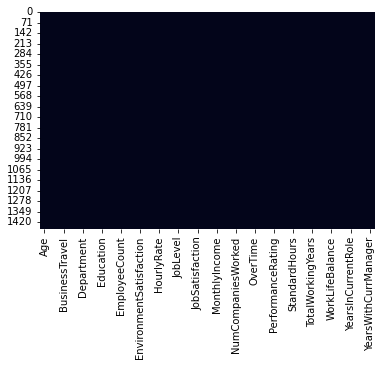

In [250]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
pd.DataFrame((df.isnull().sum() / df.shape[0])*100, columns=['Missing Values Ratio'])

In [251]:
# as we can see, there are no missing values

In [252]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [253]:
df_raw = df.copy()

In [254]:
# to see which columns are booleans, yes/y or no/n
binary_columns = df.apply(lambda x: x.isin(["Yes", "No", "Y", "N"]).any(), axis=0)
print(binary_columns)

Age                         False
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [255]:
# converting "Yes" to 1 and "No" to 0 for the "Attrition" column
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# converting "Y" to 1 and "N" to 0 for the "Over18" column
df["Over18"] = df["Over18"].map({"Y": 1, "N": 0})

# converting "Yes" to 1 and "No" to 0 for the "OverTime" column
df["OverTime"] = df["OverTime"].map({"Yes": 1, "No": 0})

In [256]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [257]:
# to check again
print(df[['Attrition', 'Over18', 'OverTime']])

      Attrition  Over18  OverTime
0             1       1         1
1             0       1         0
2             1       1         1
3             0       1         1
4             0       1         0
...         ...     ...       ...
1465          0       1         0
1466          0       1         0
1467          0       1         1
1468          0       1         0
1469          0       1         0

[1470 rows x 3 columns]


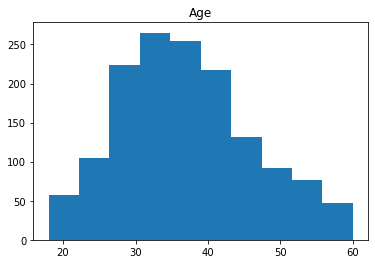

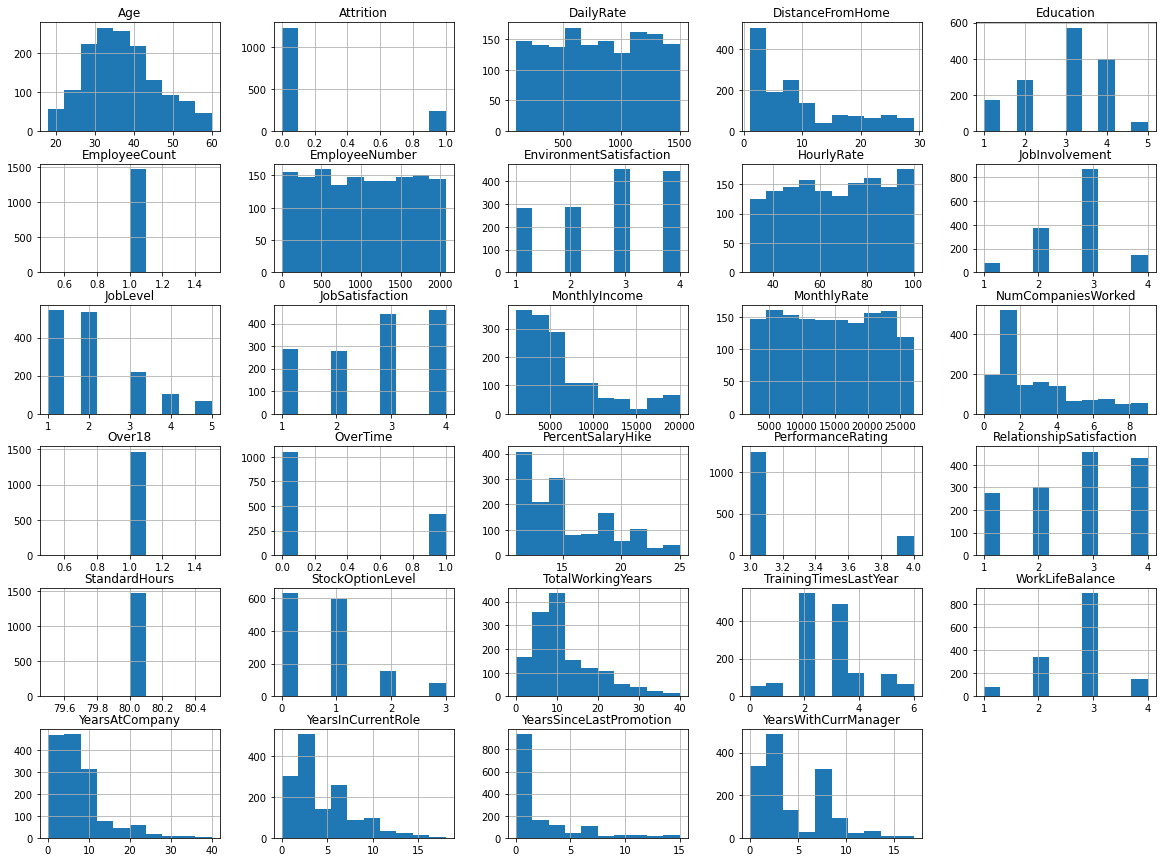

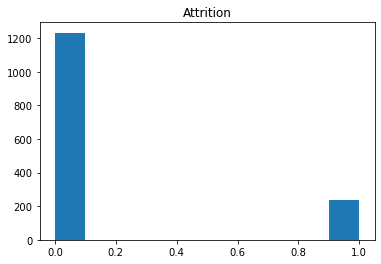

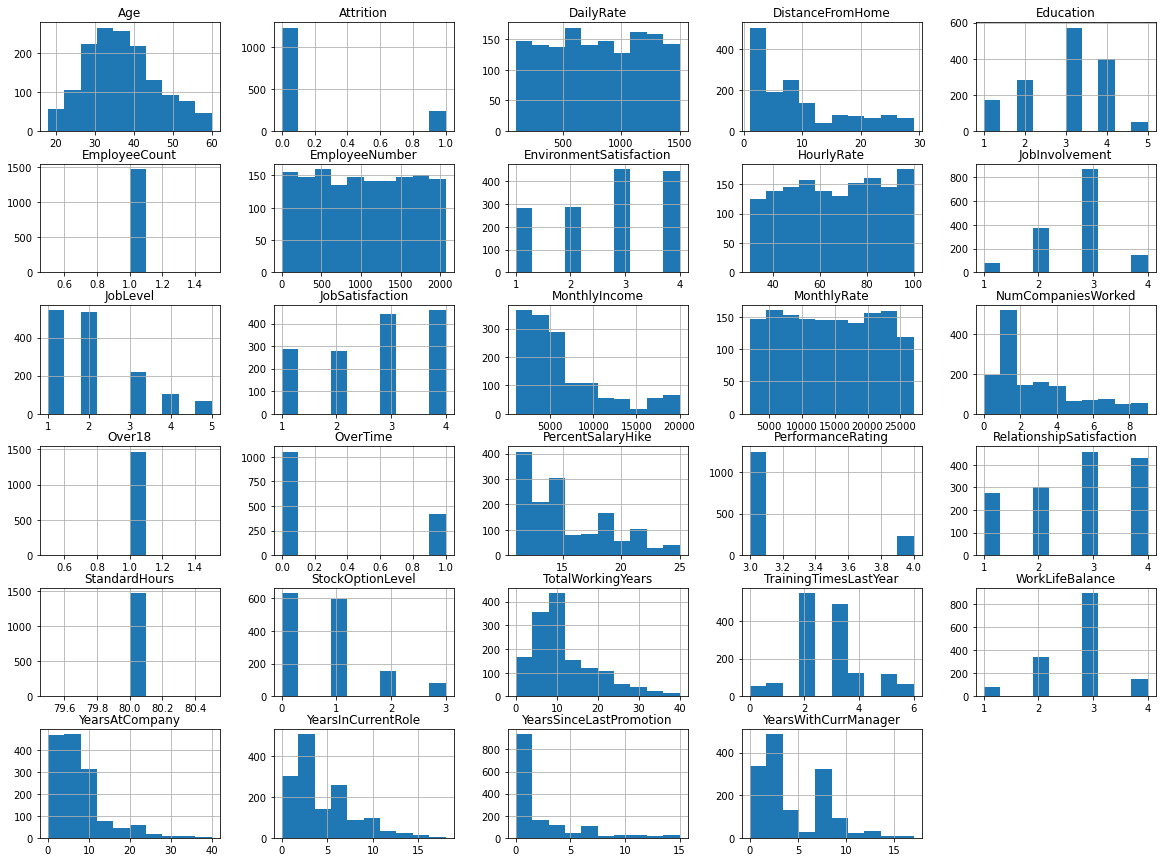

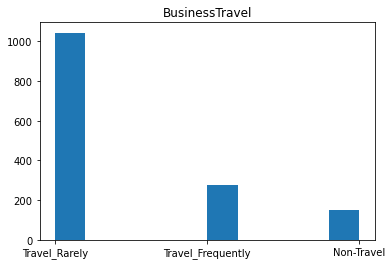

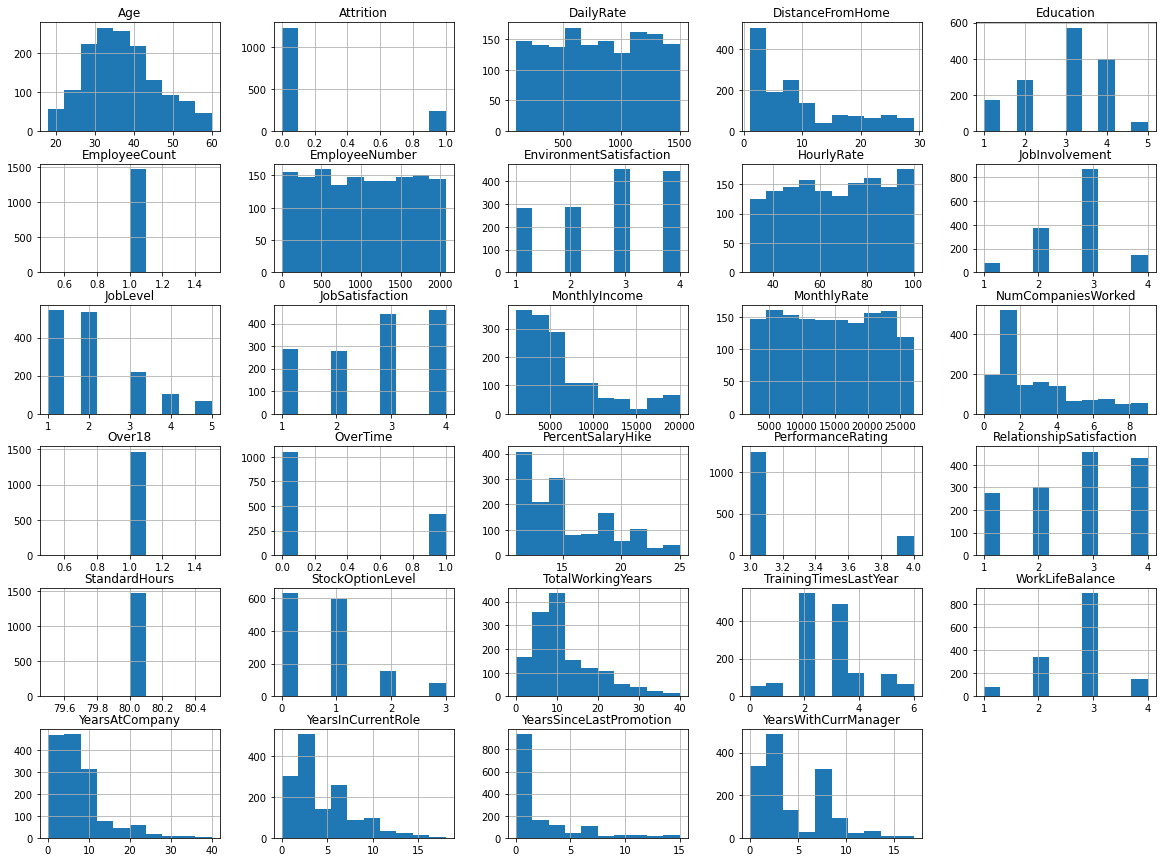

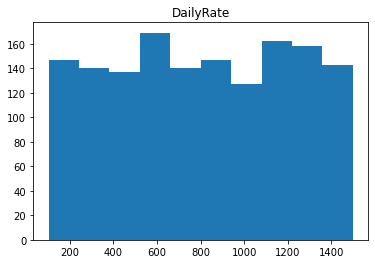

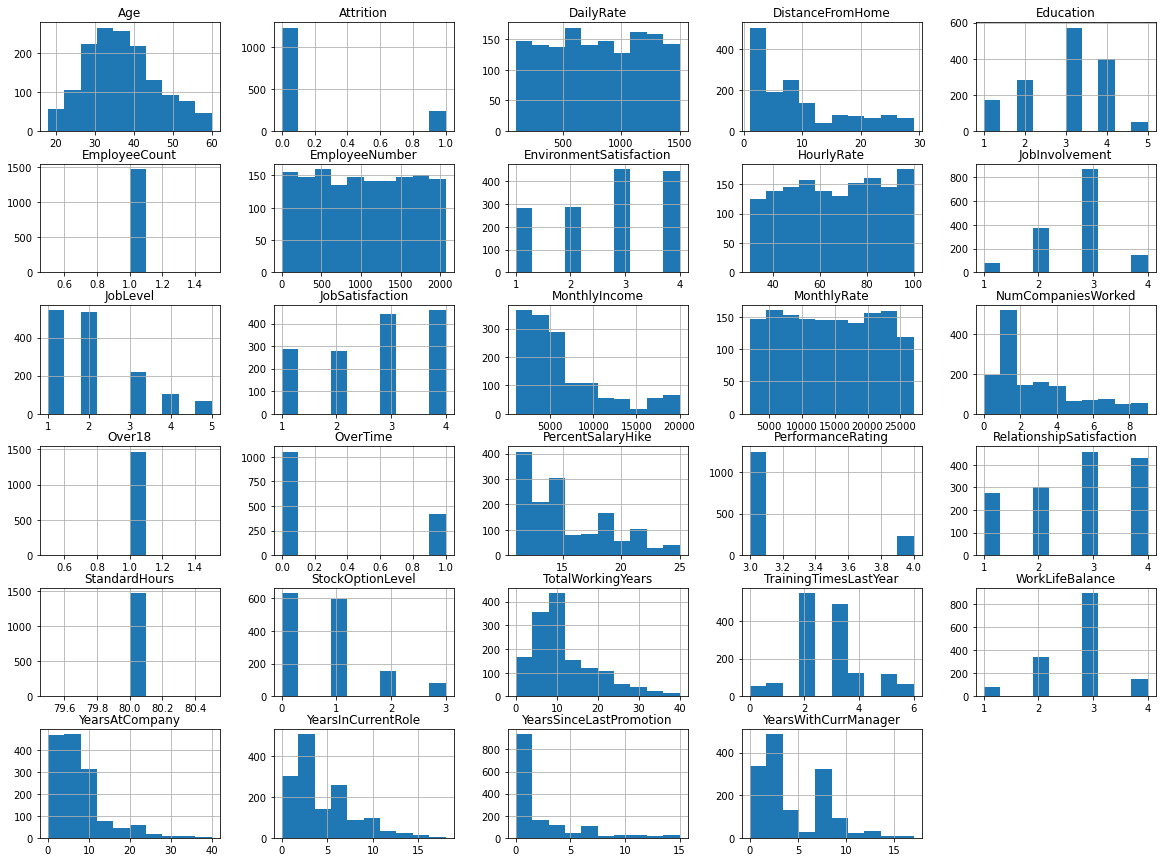

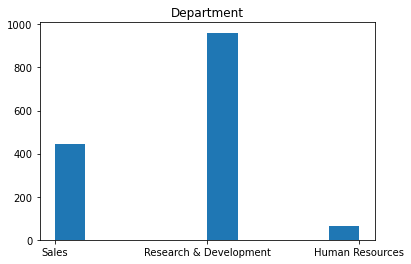

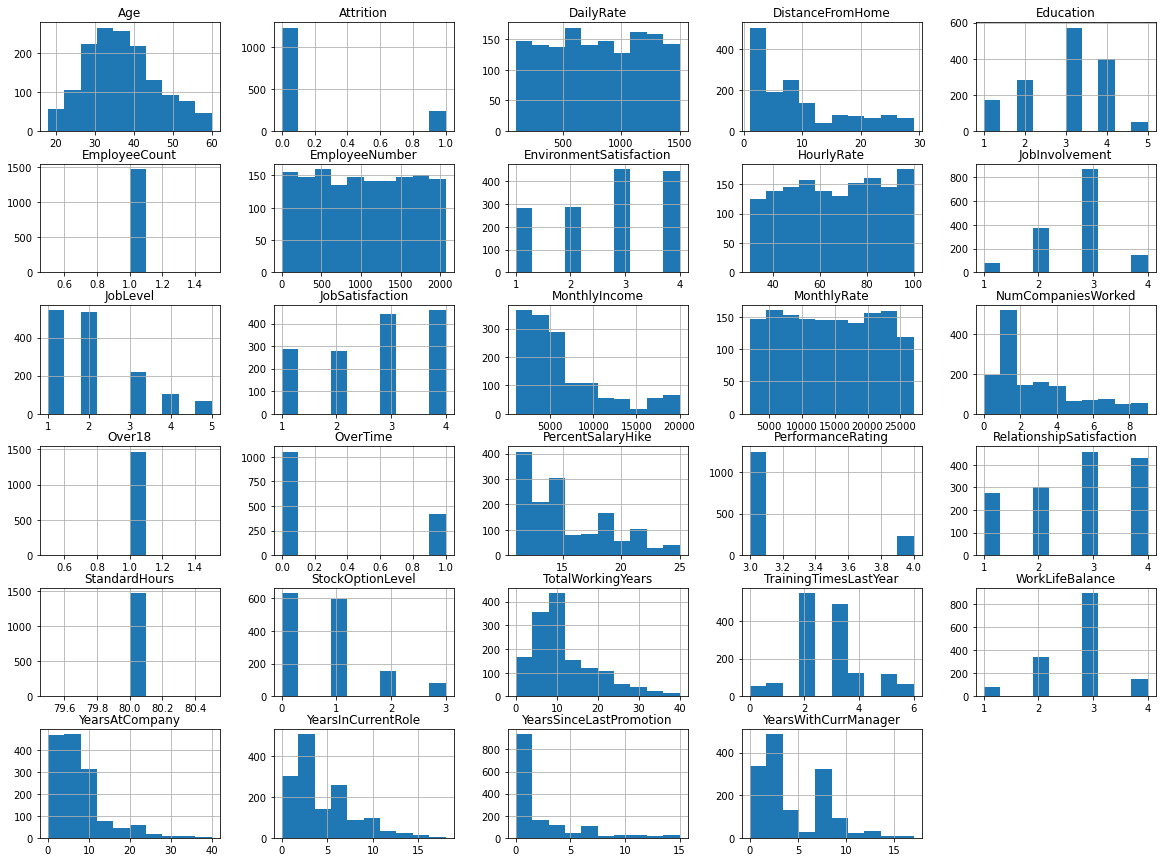

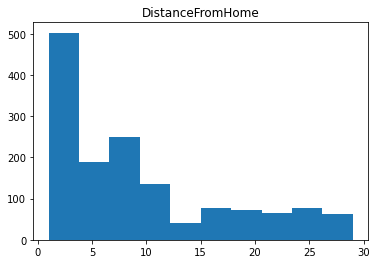

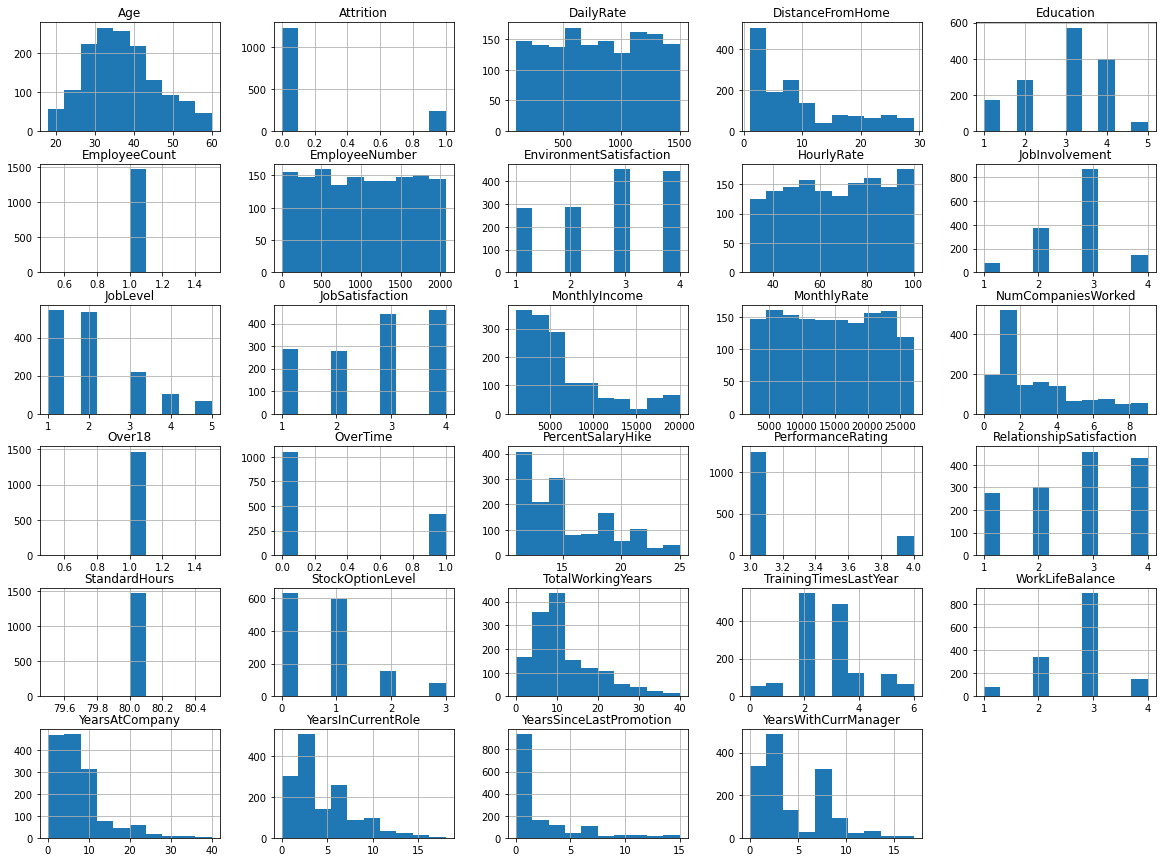

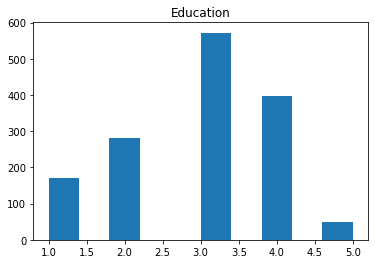

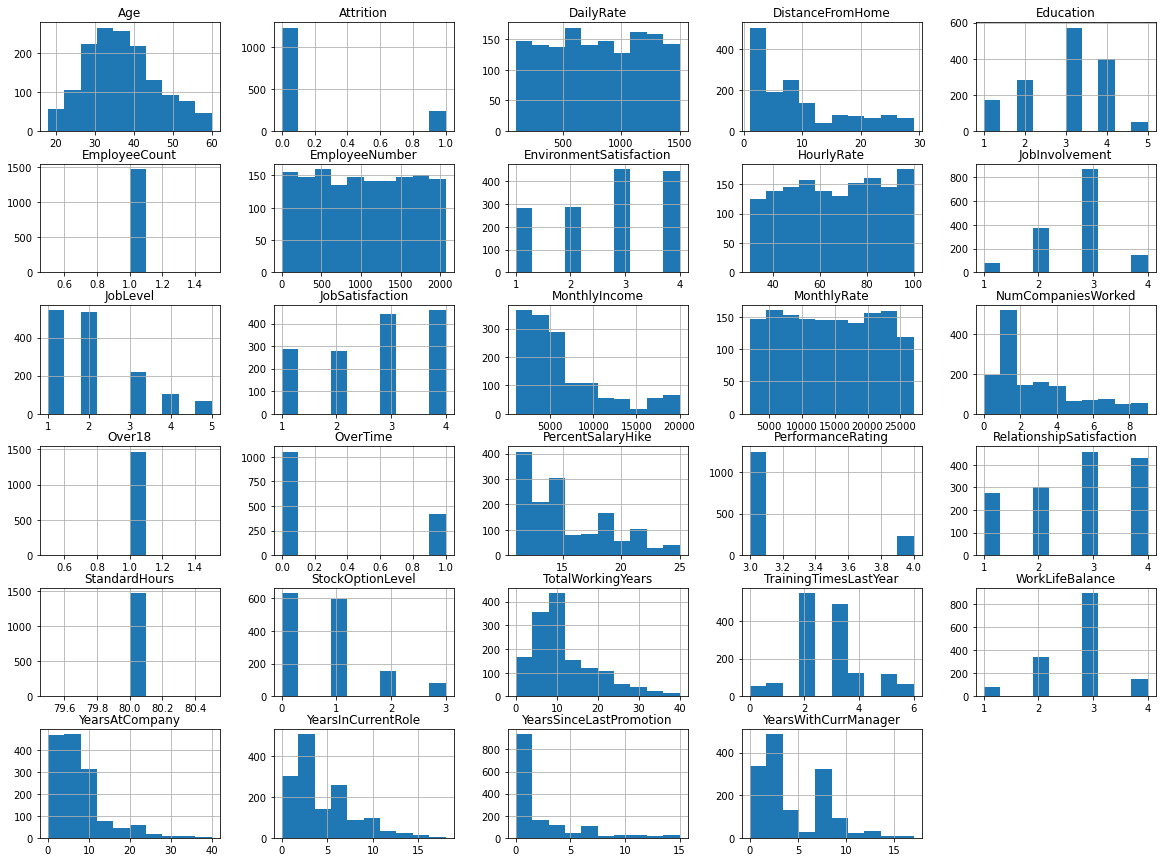

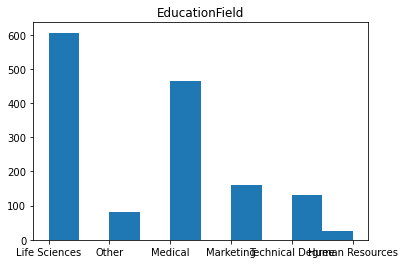

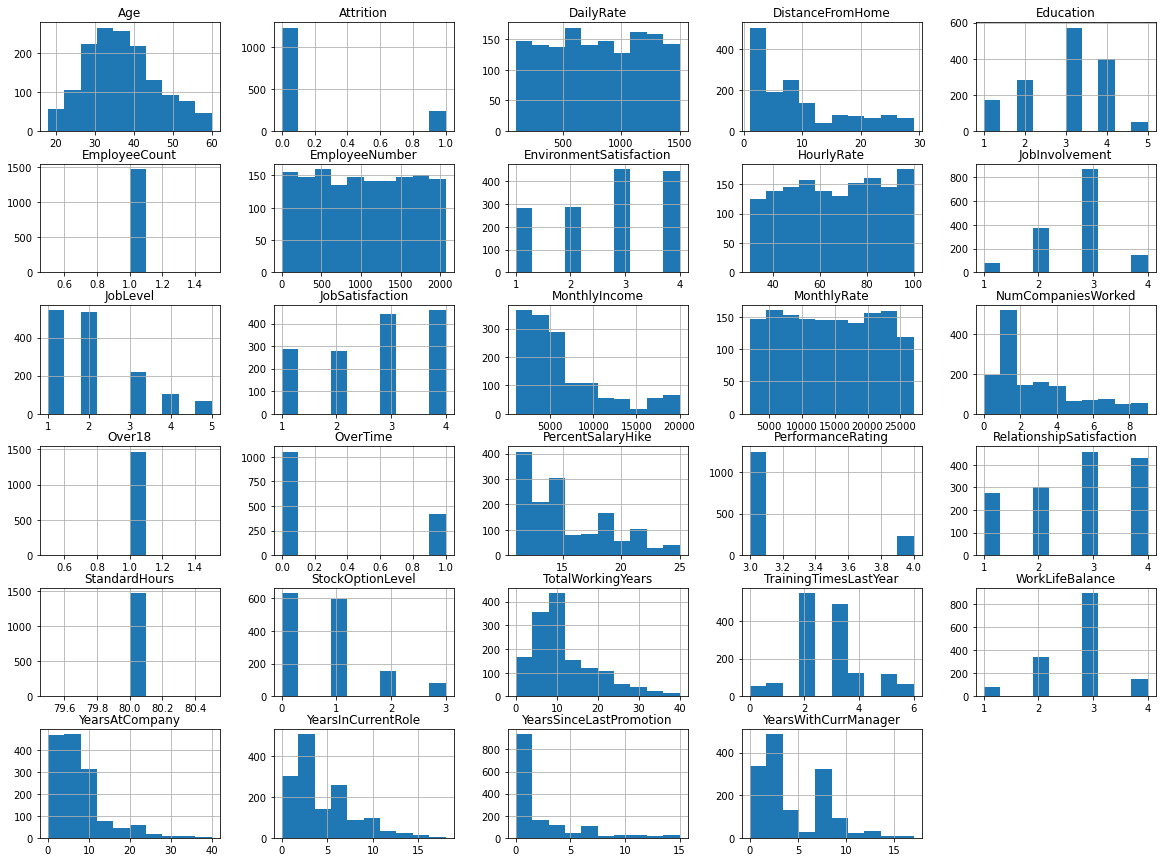

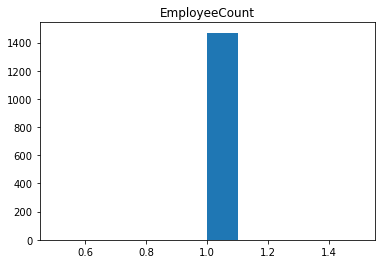

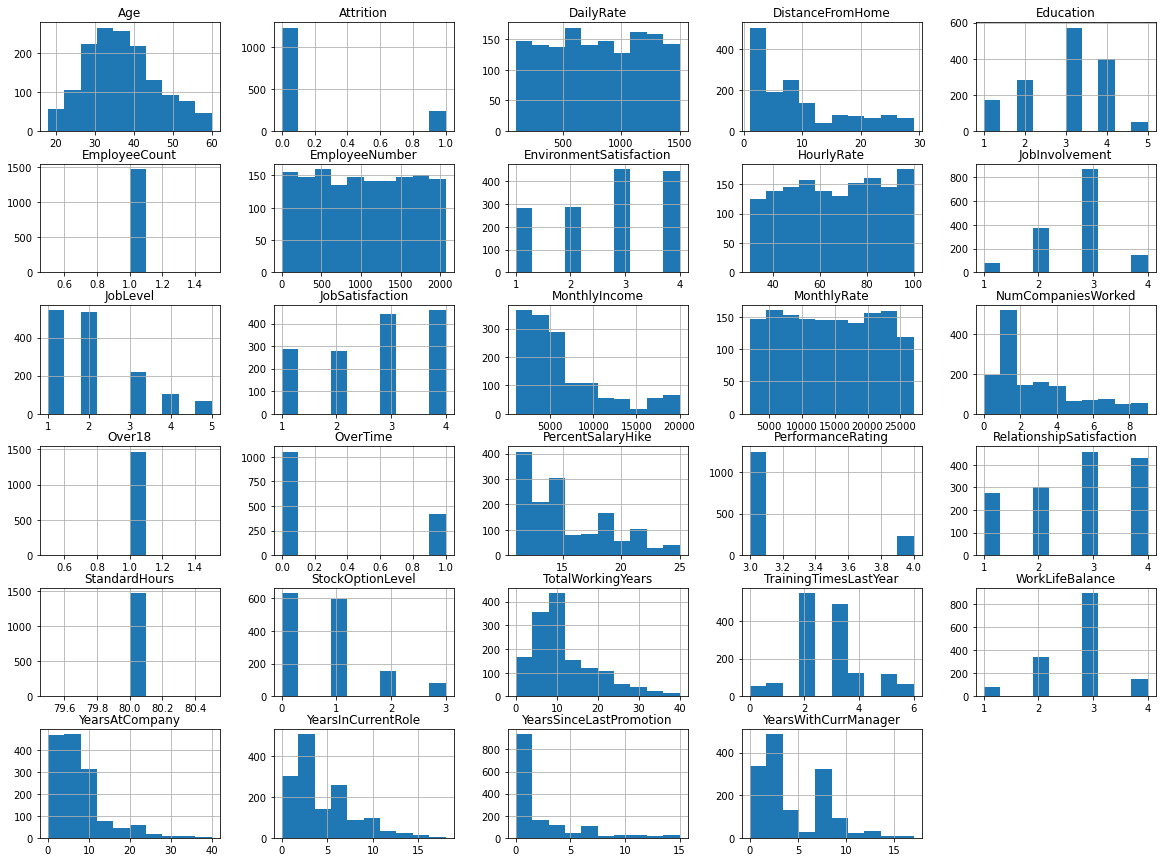

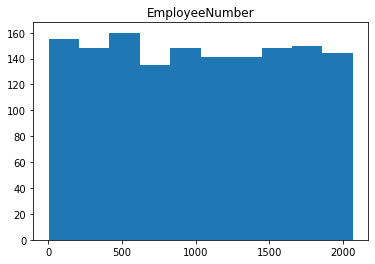

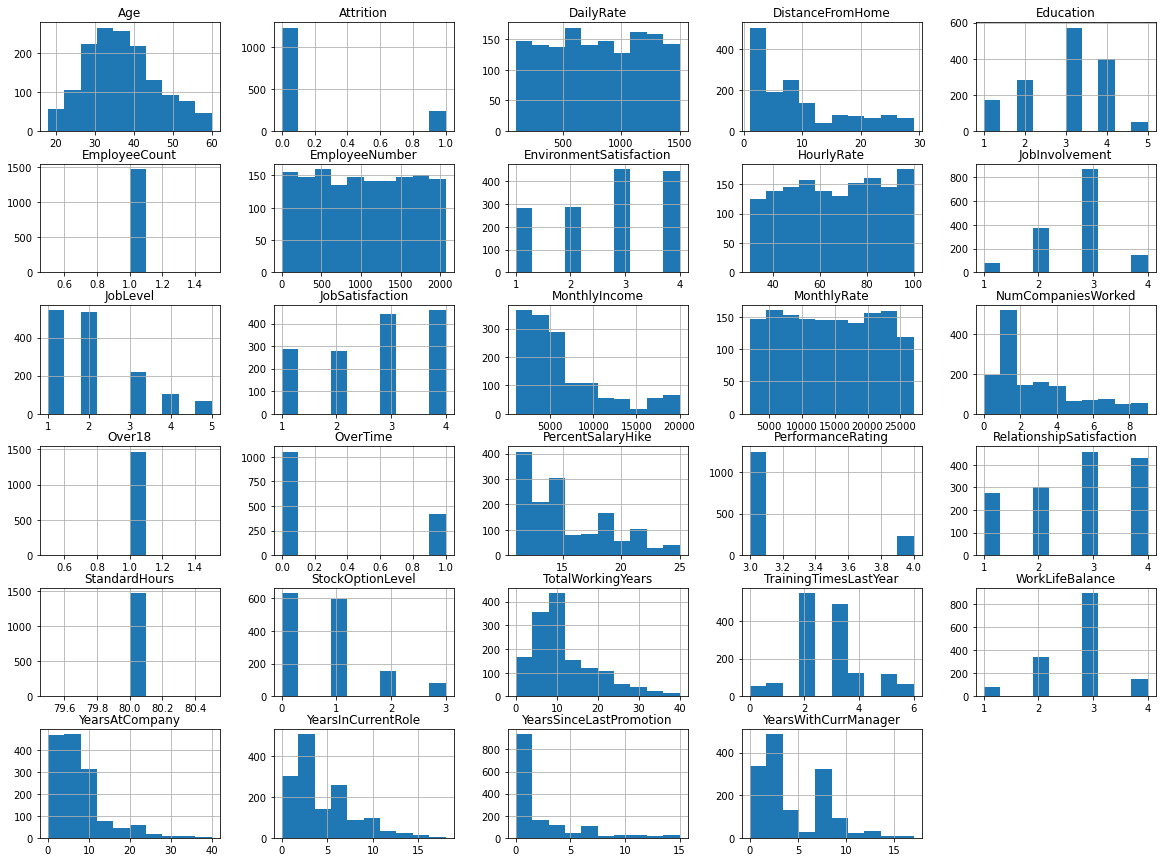

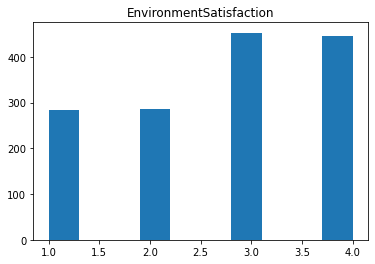

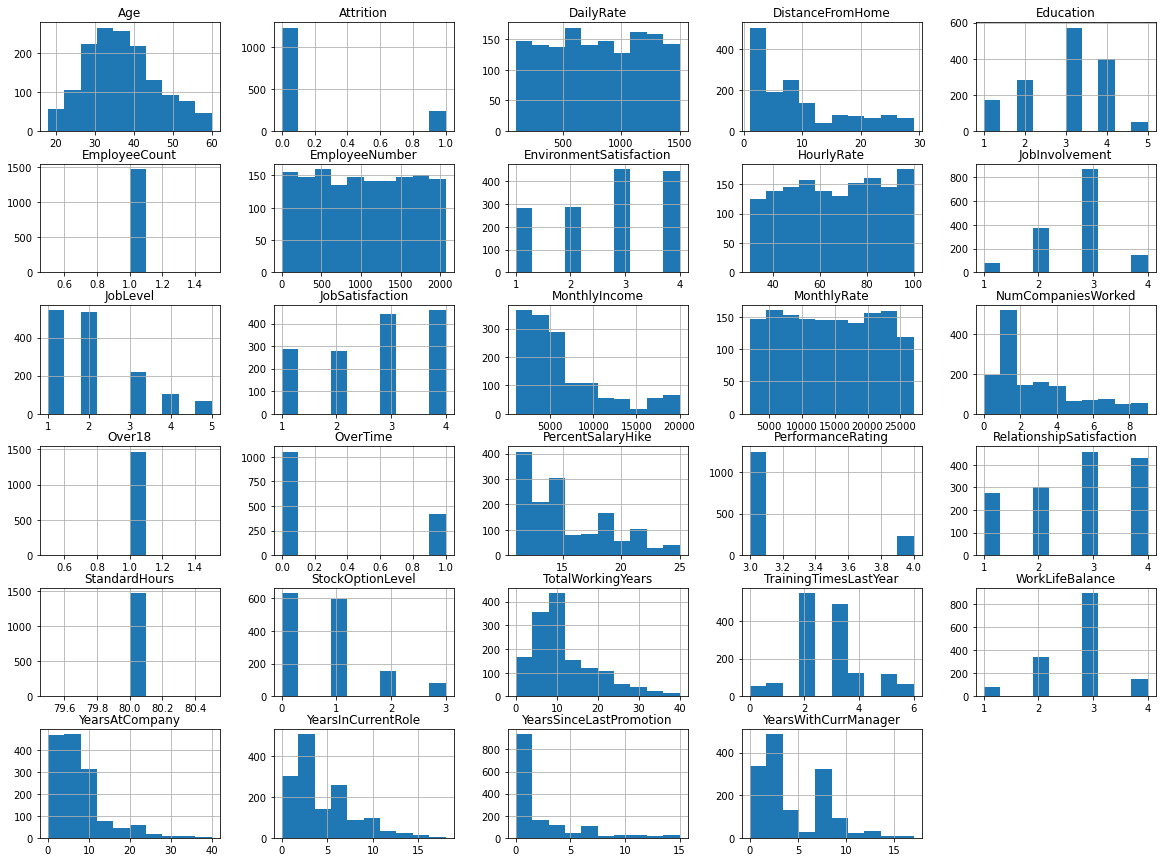

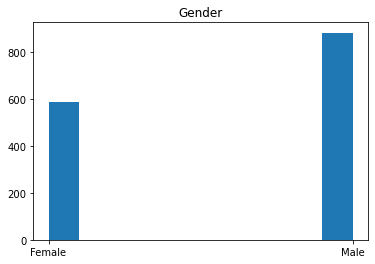

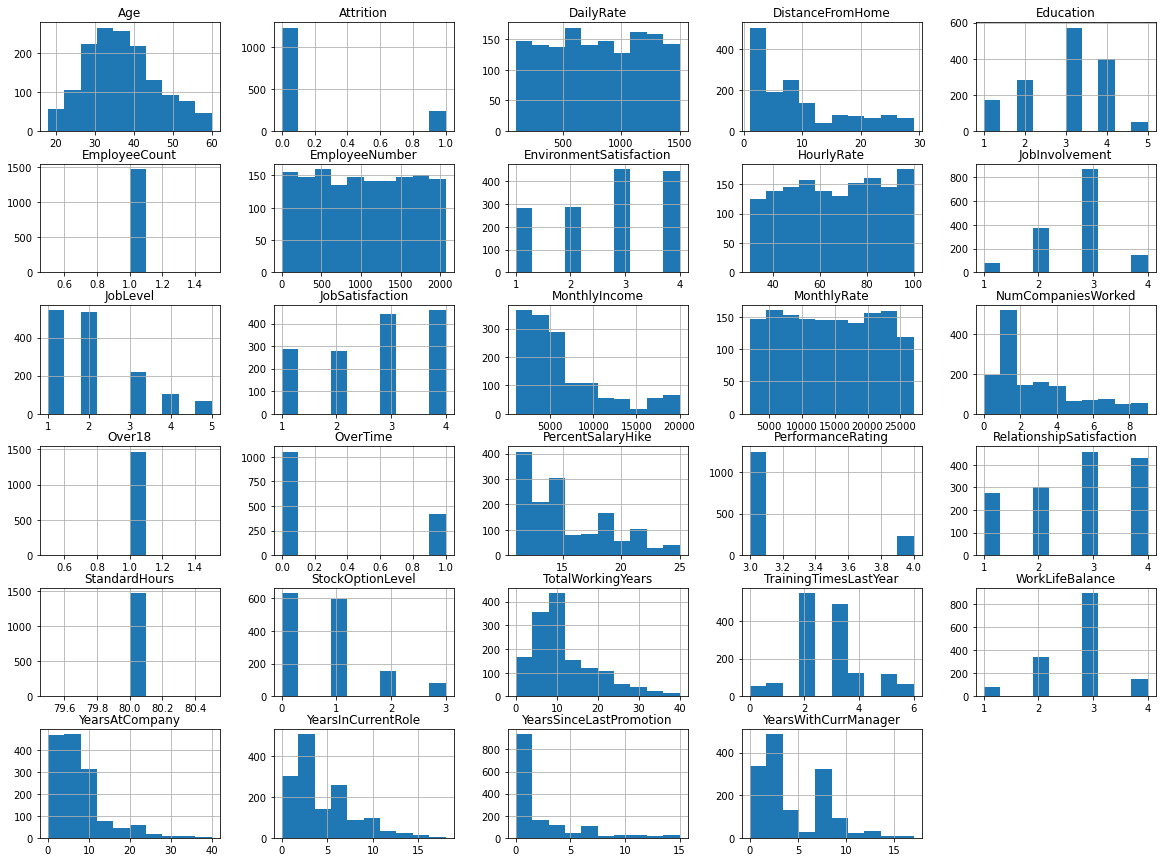

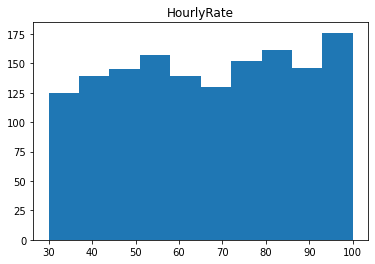

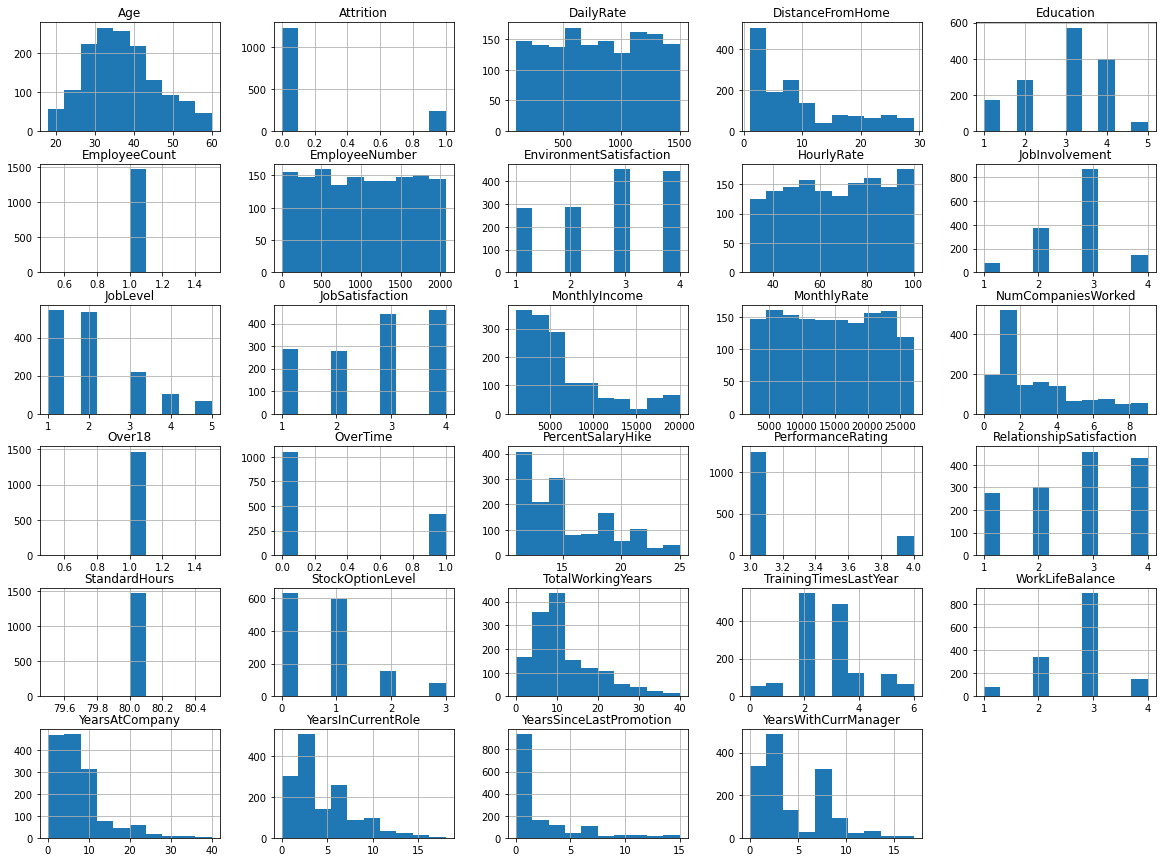

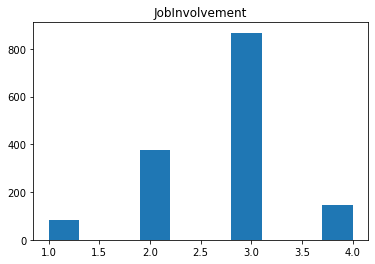

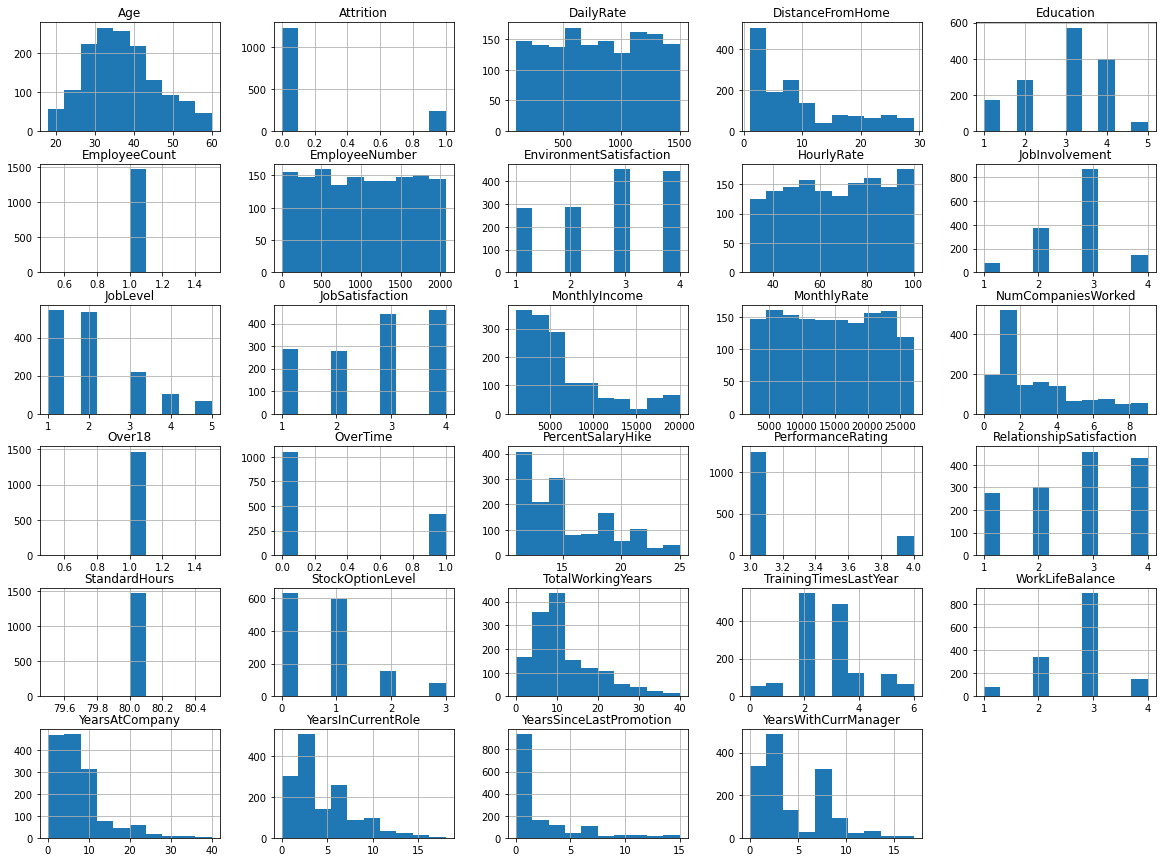

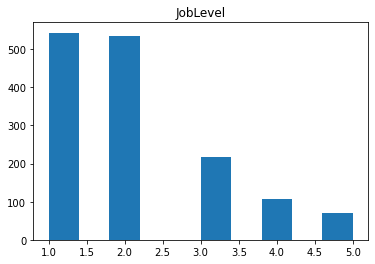

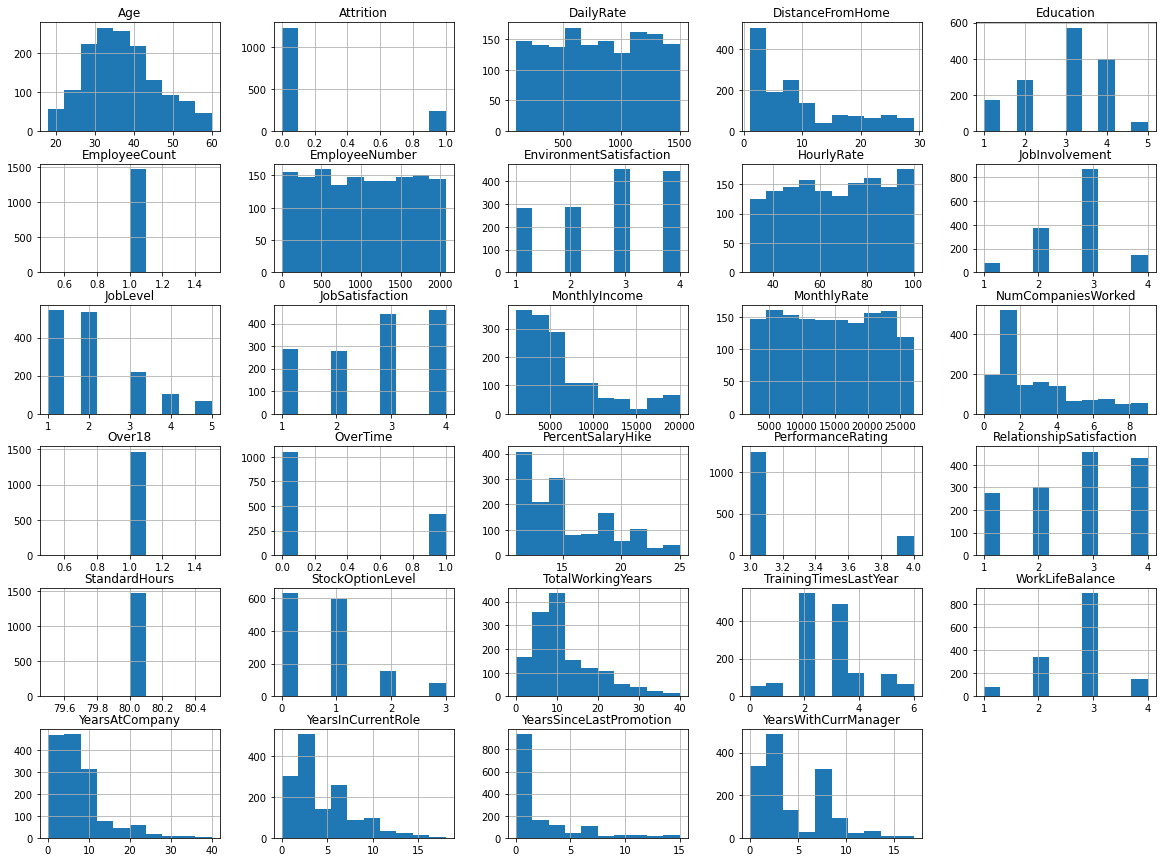

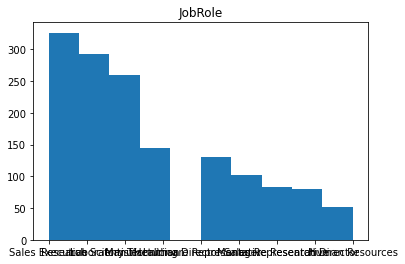

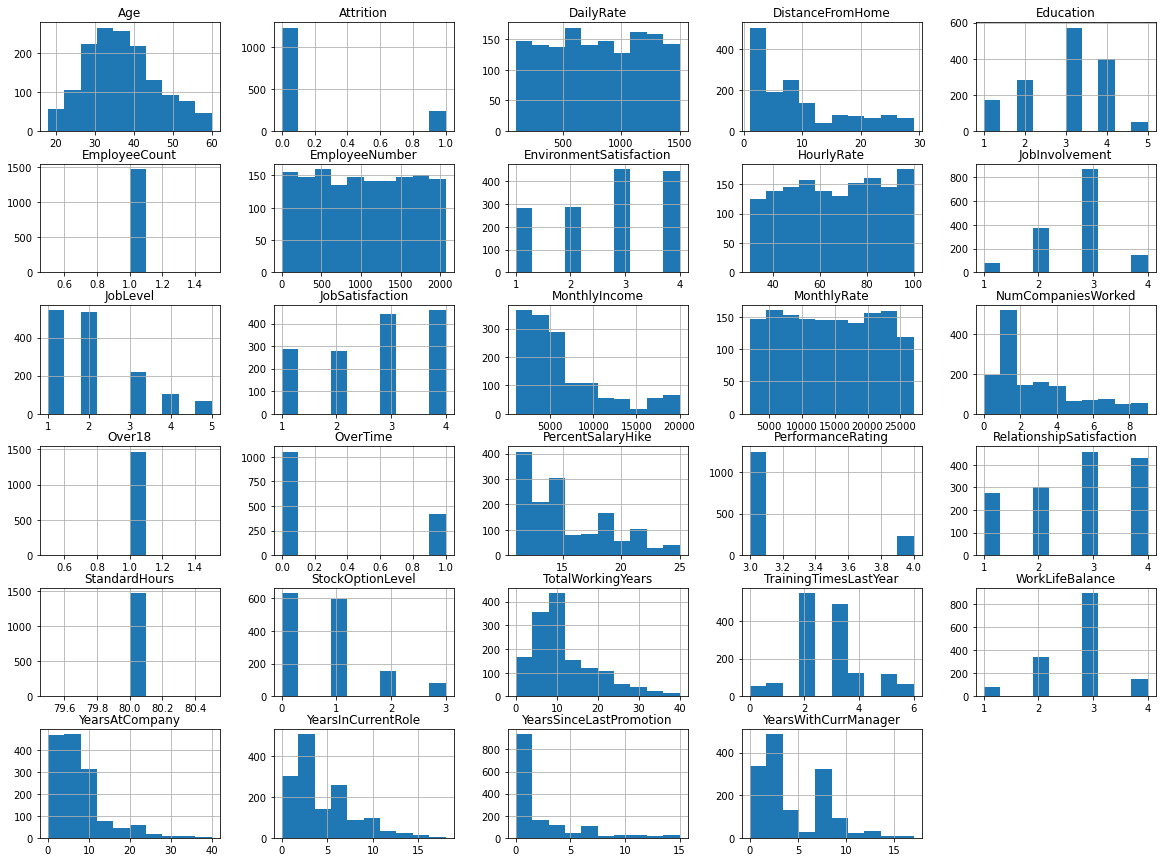

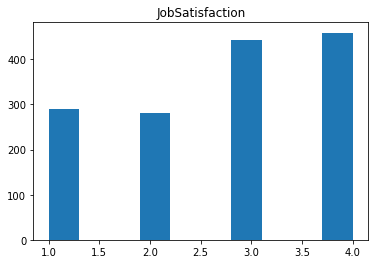

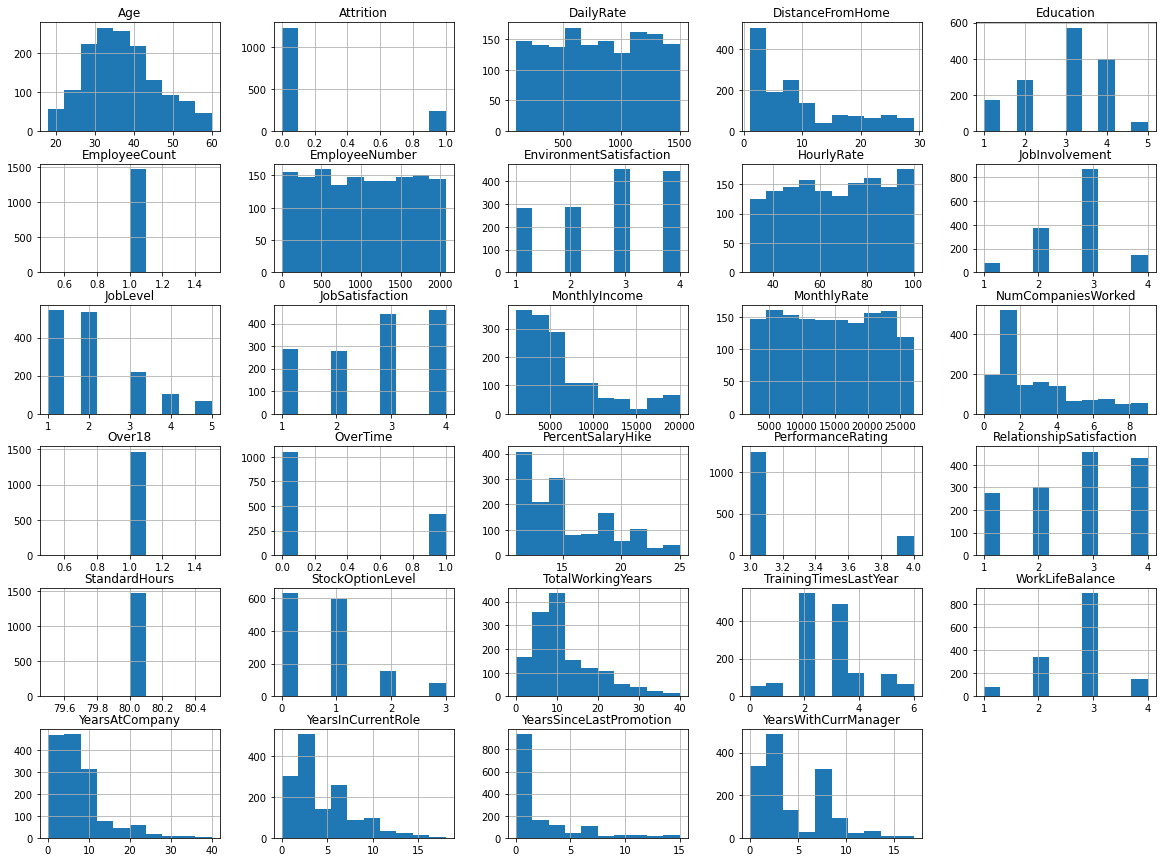

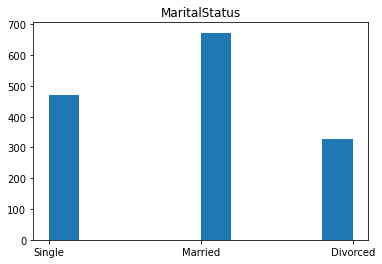

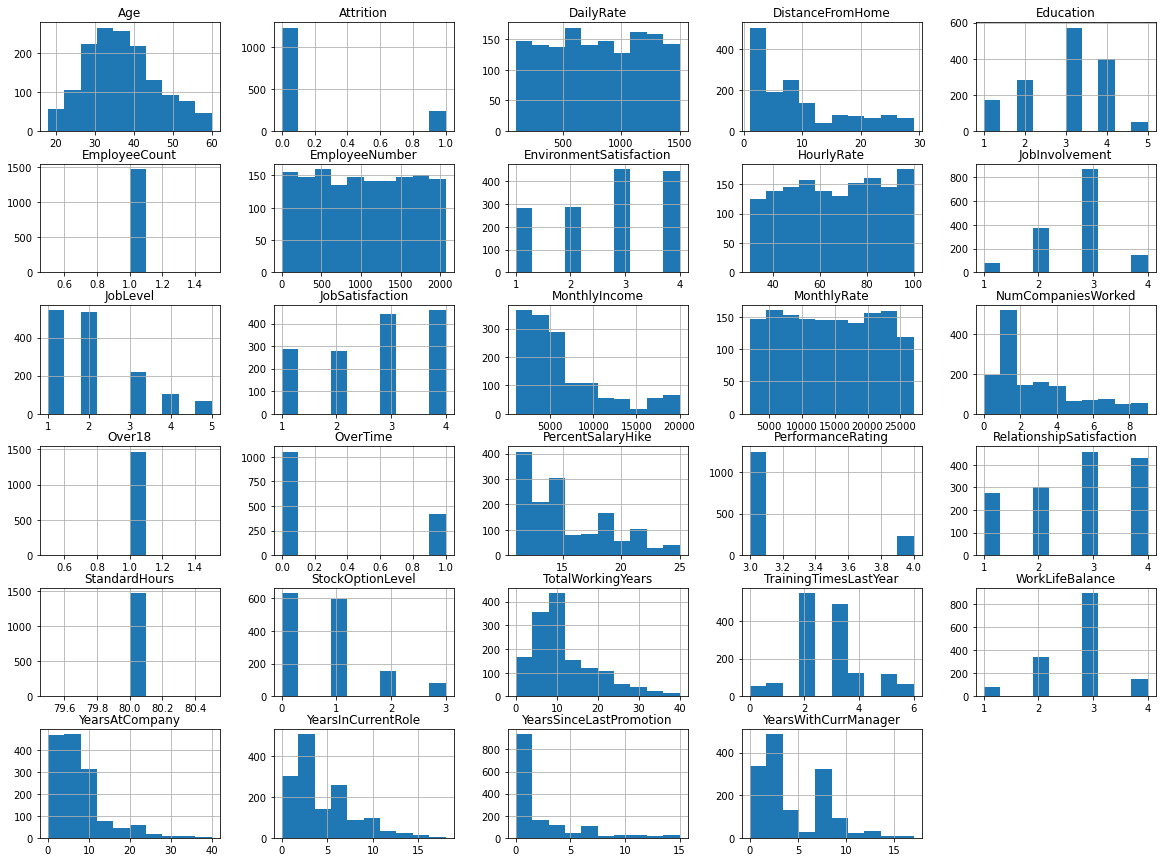

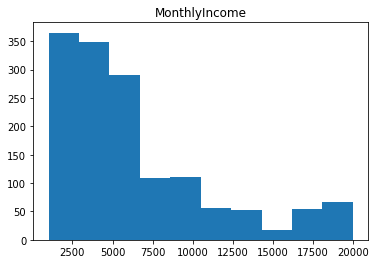

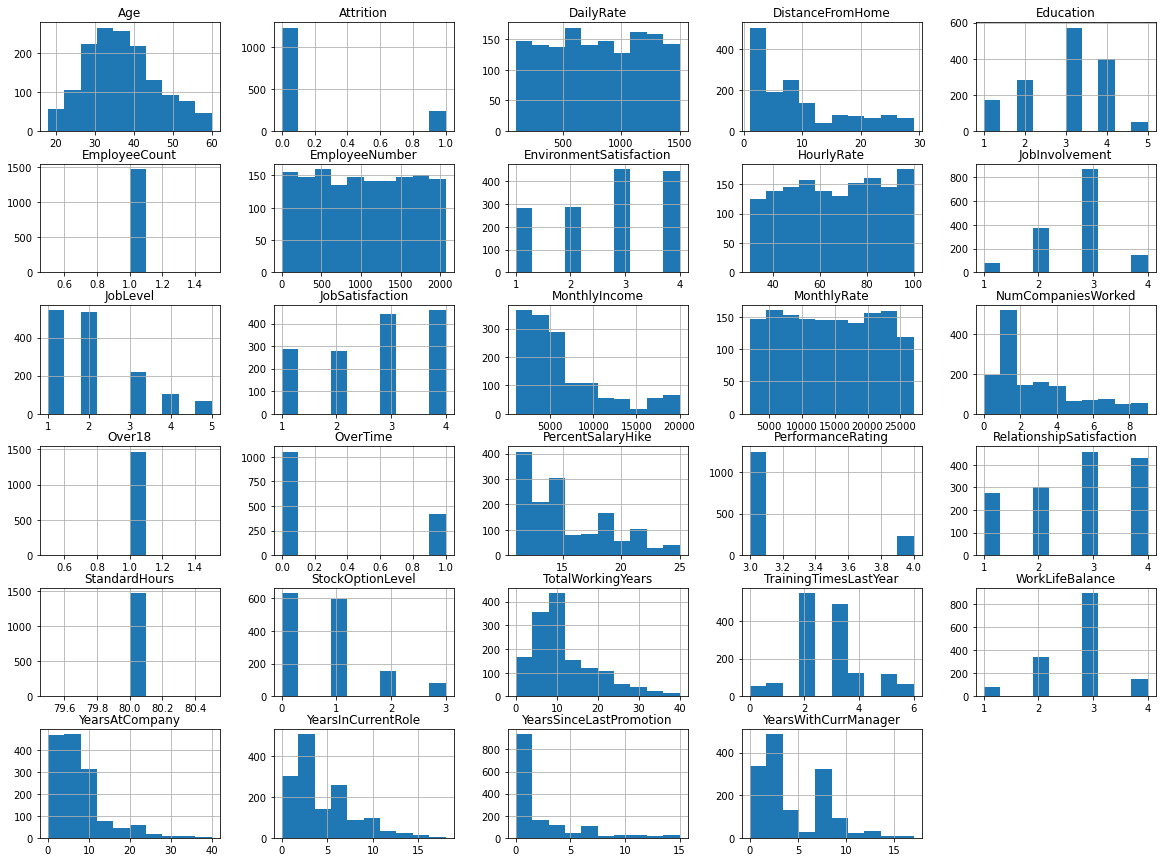

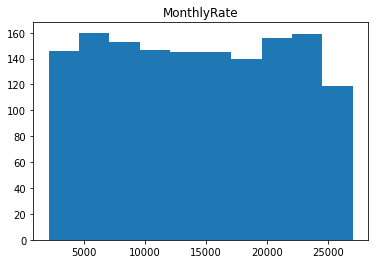

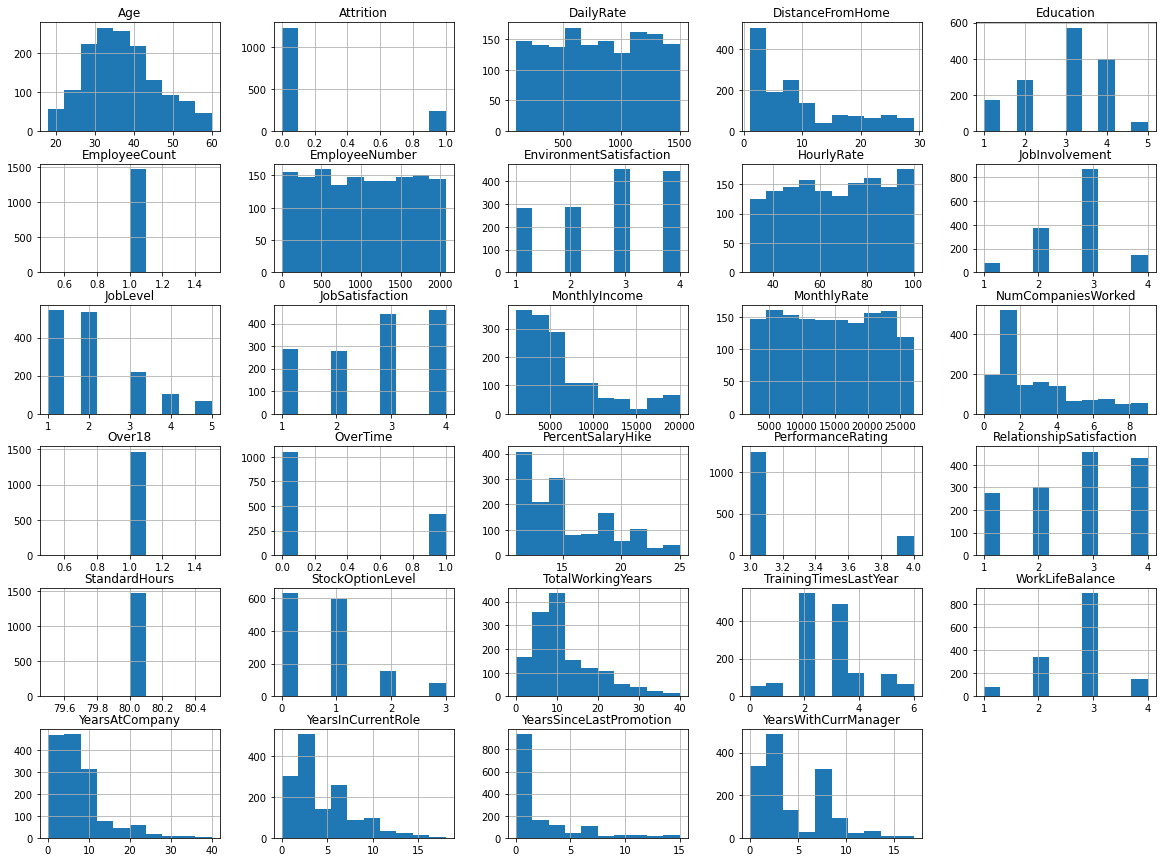

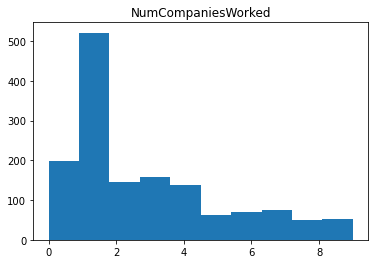

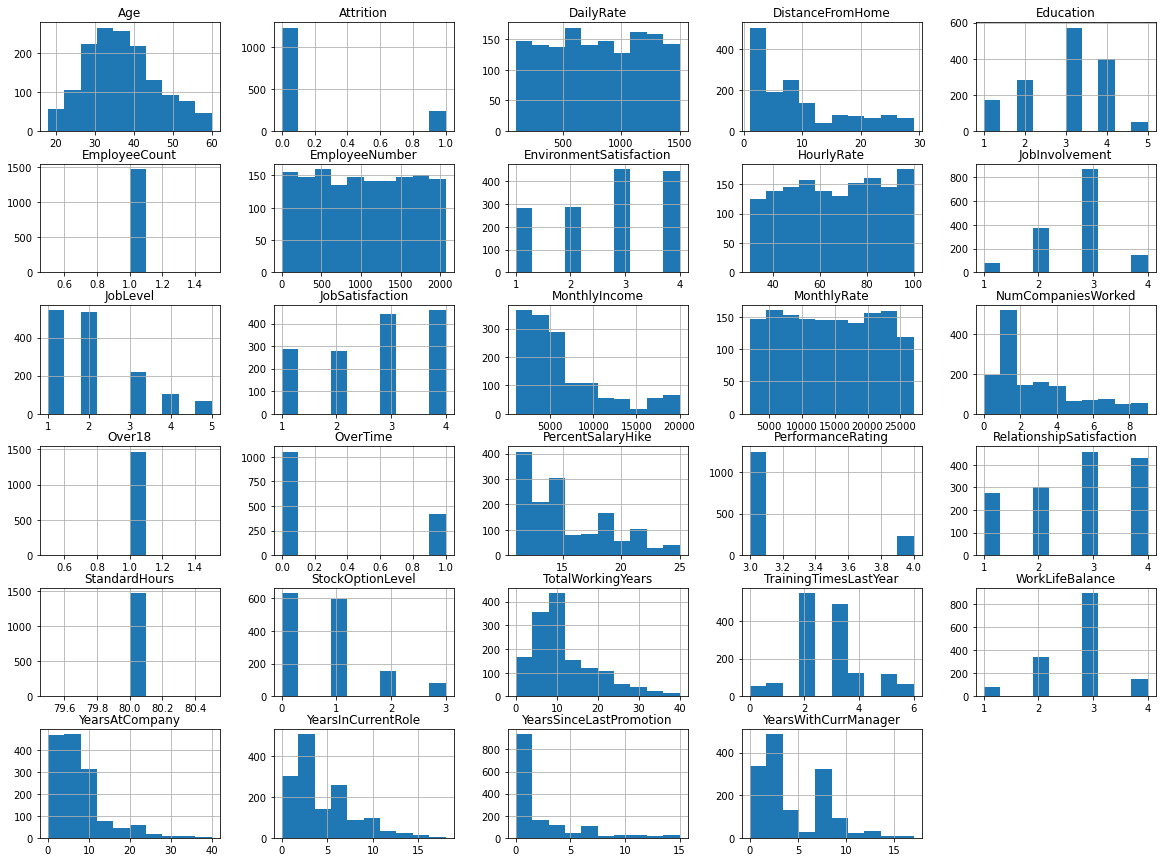

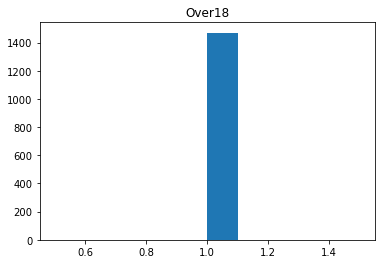

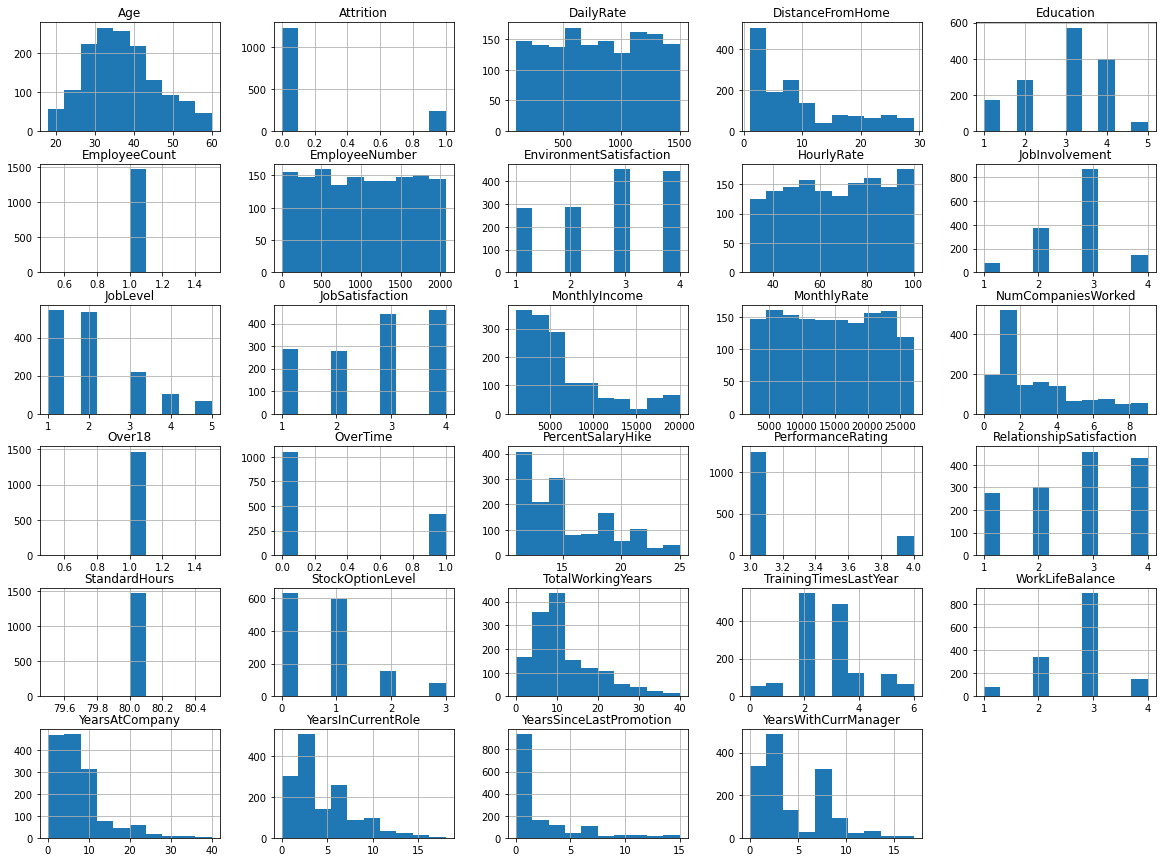

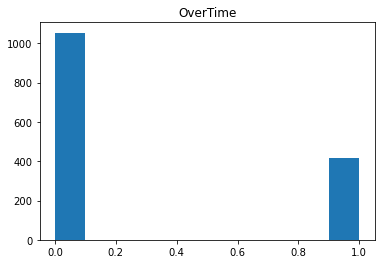

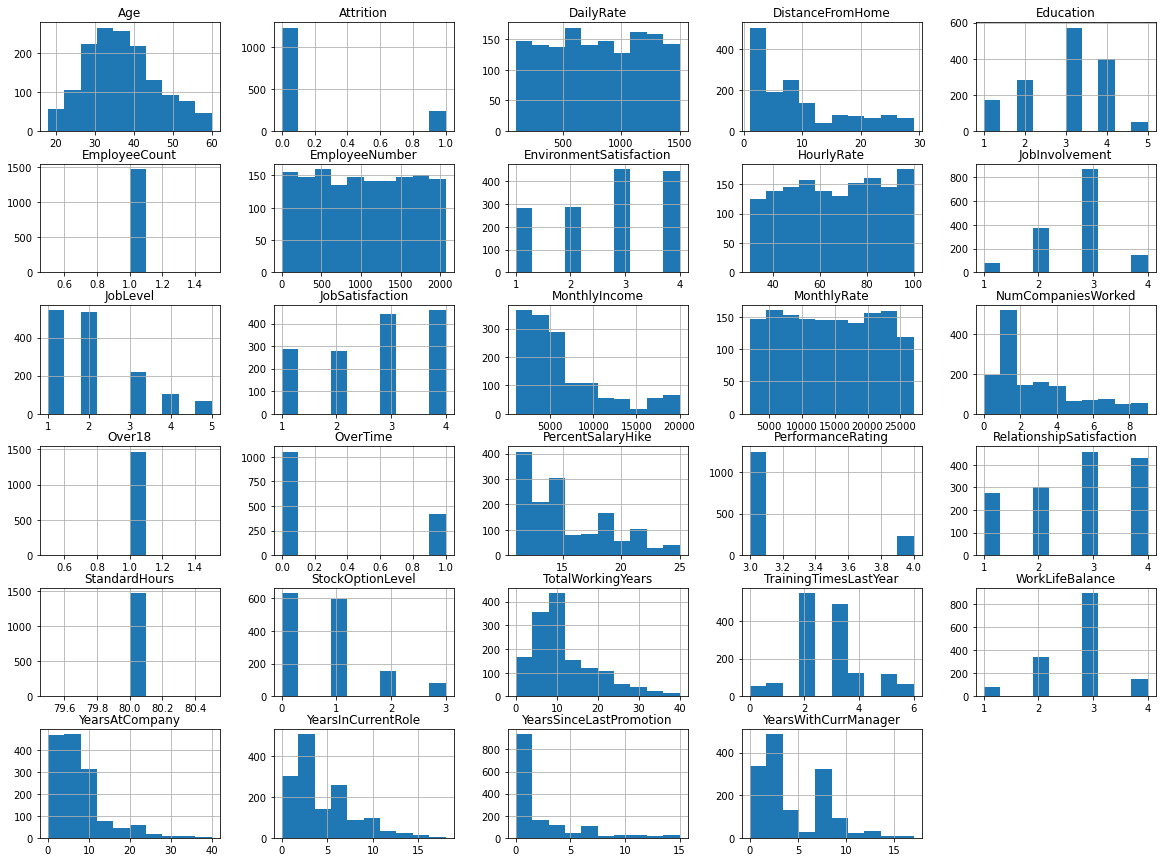

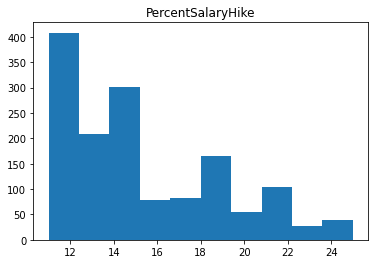

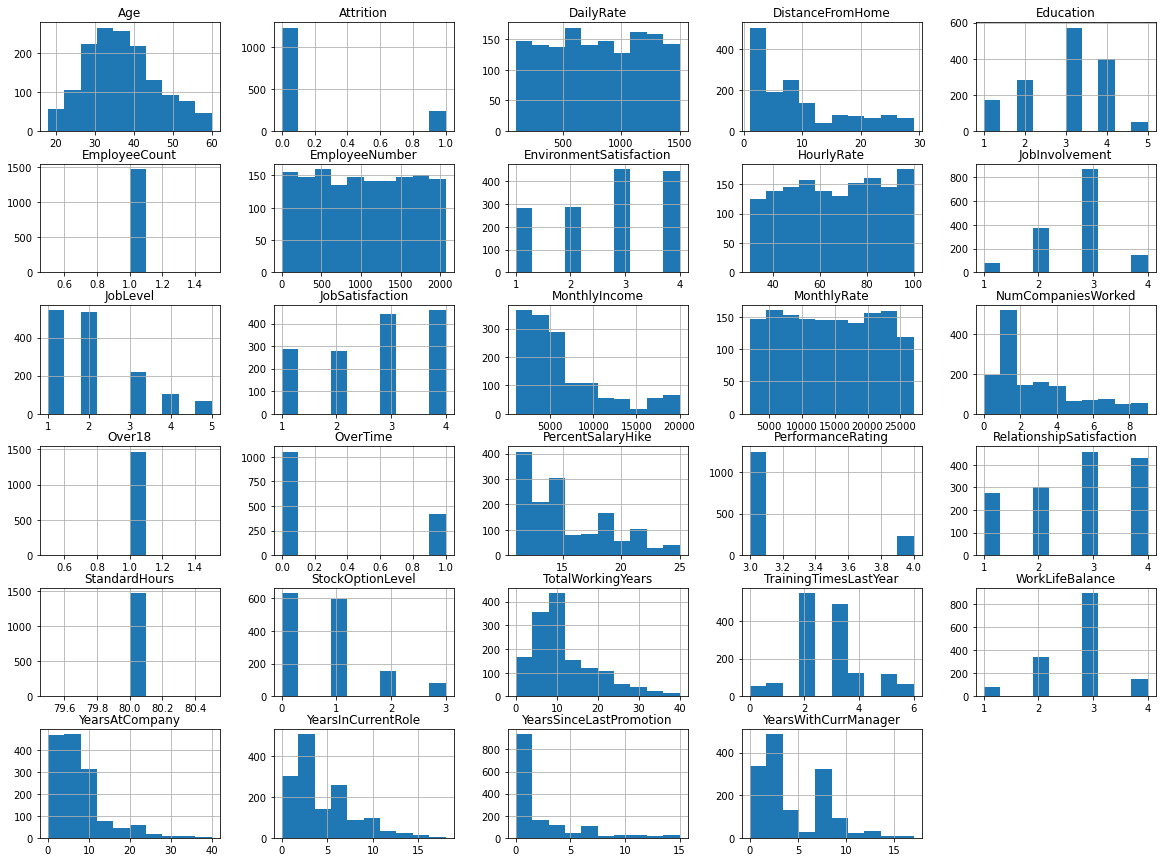

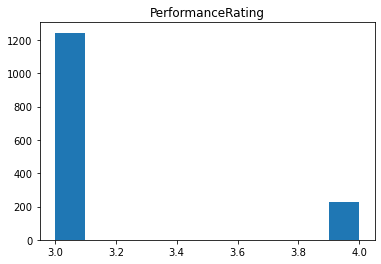

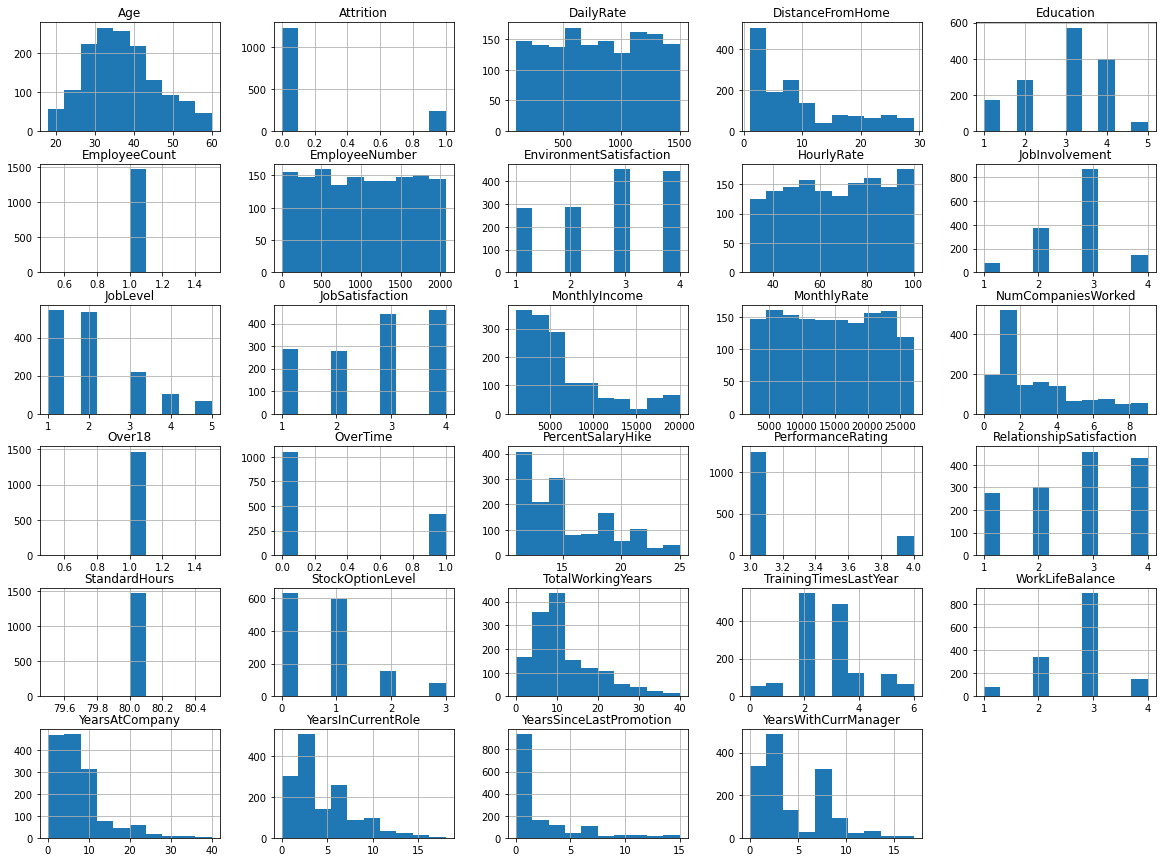

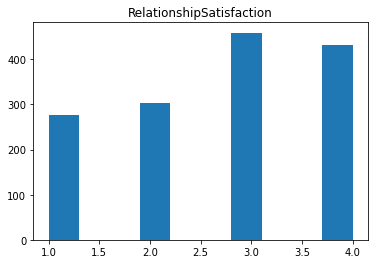

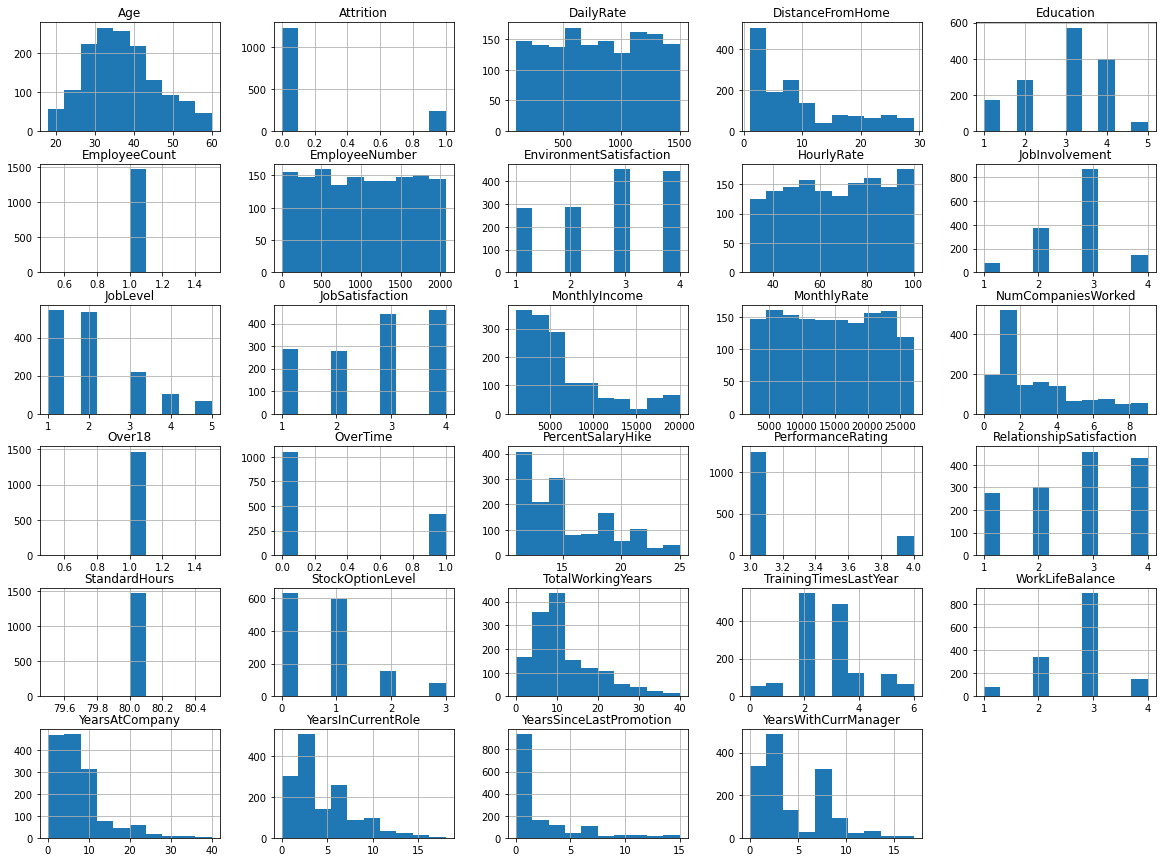

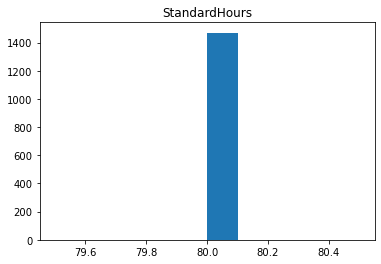

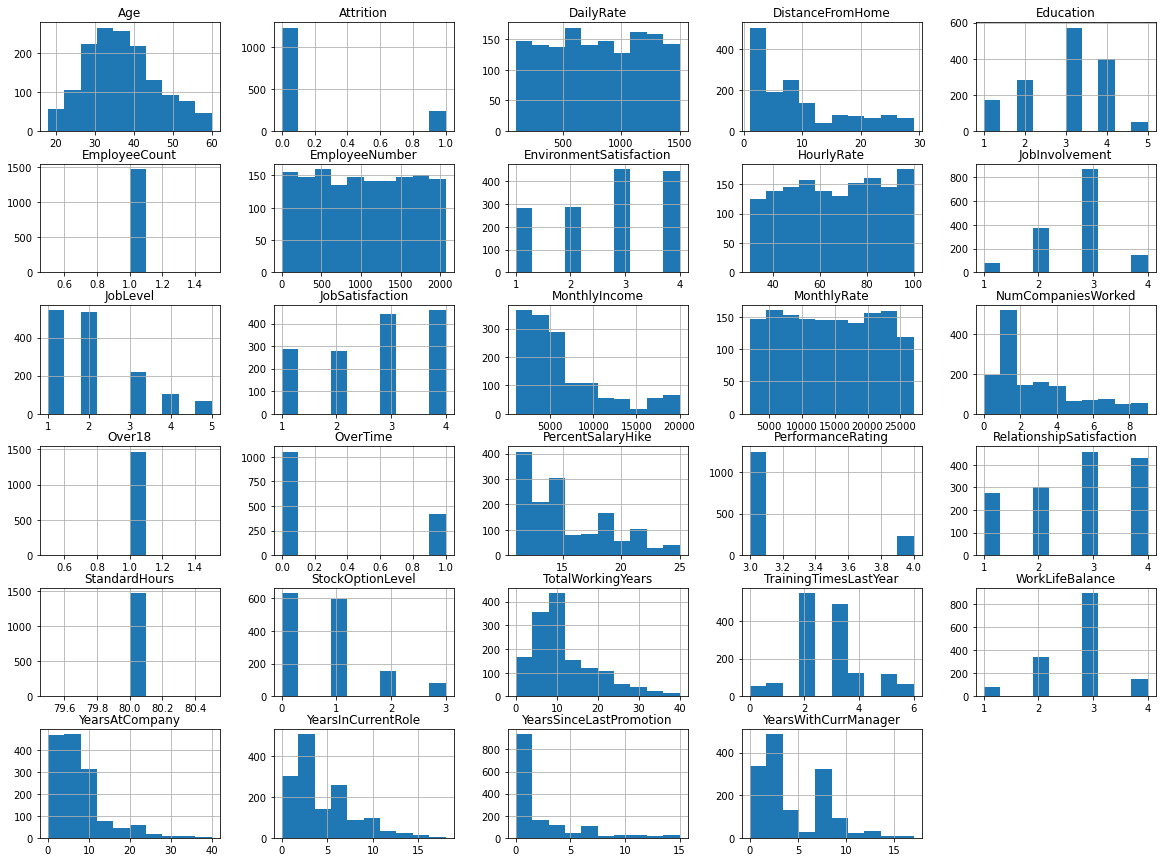

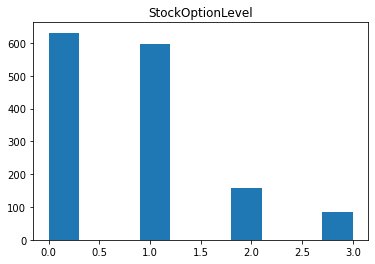

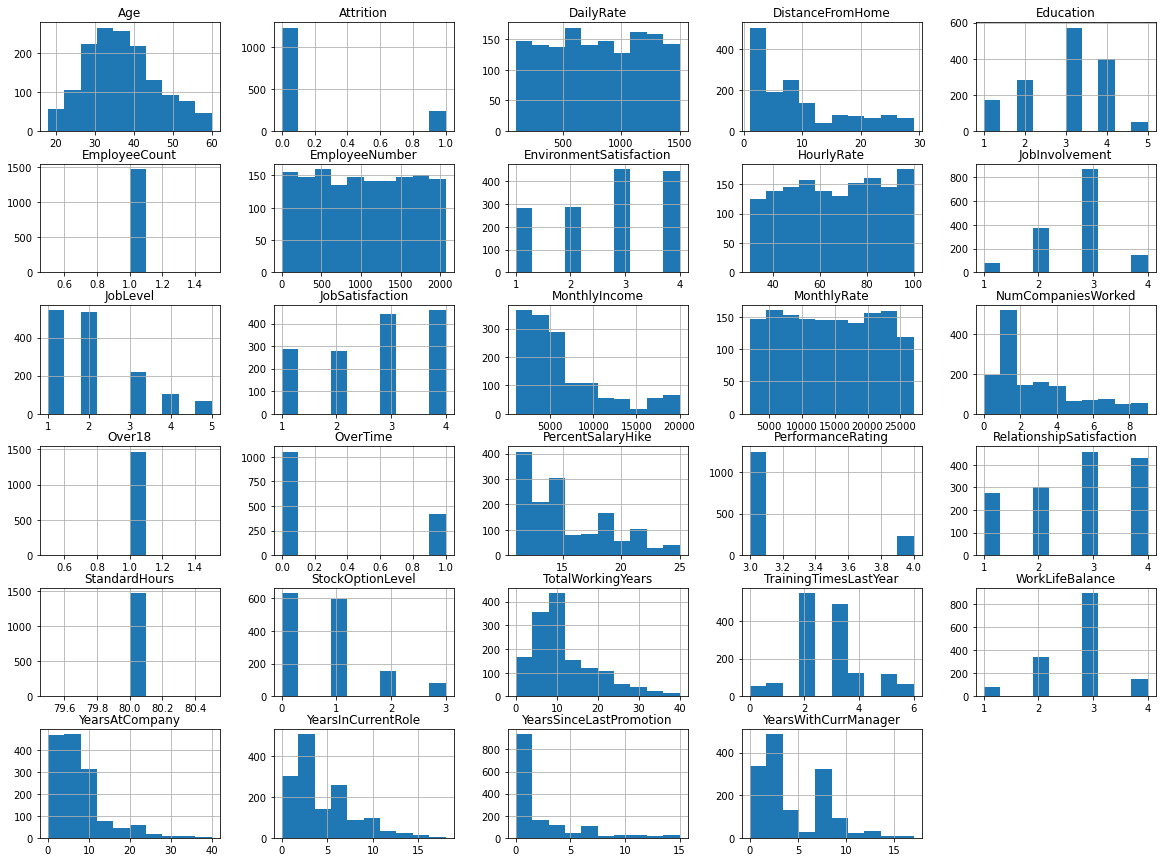

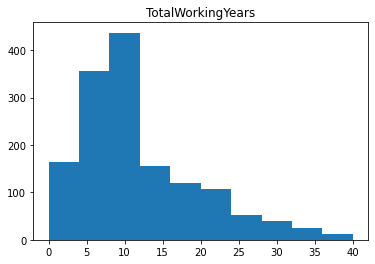

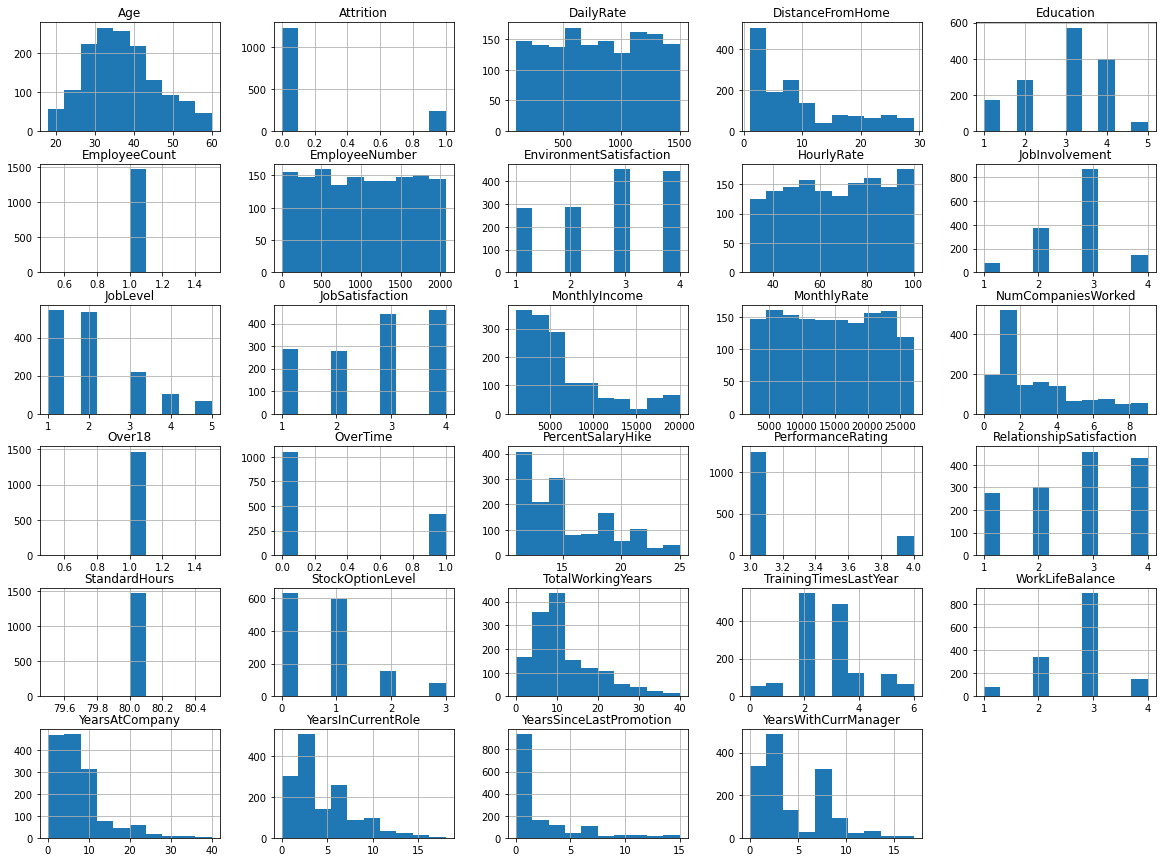

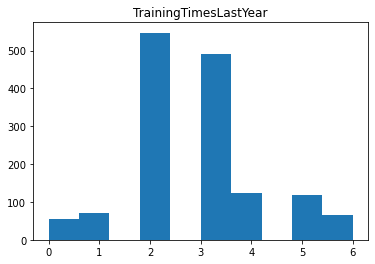

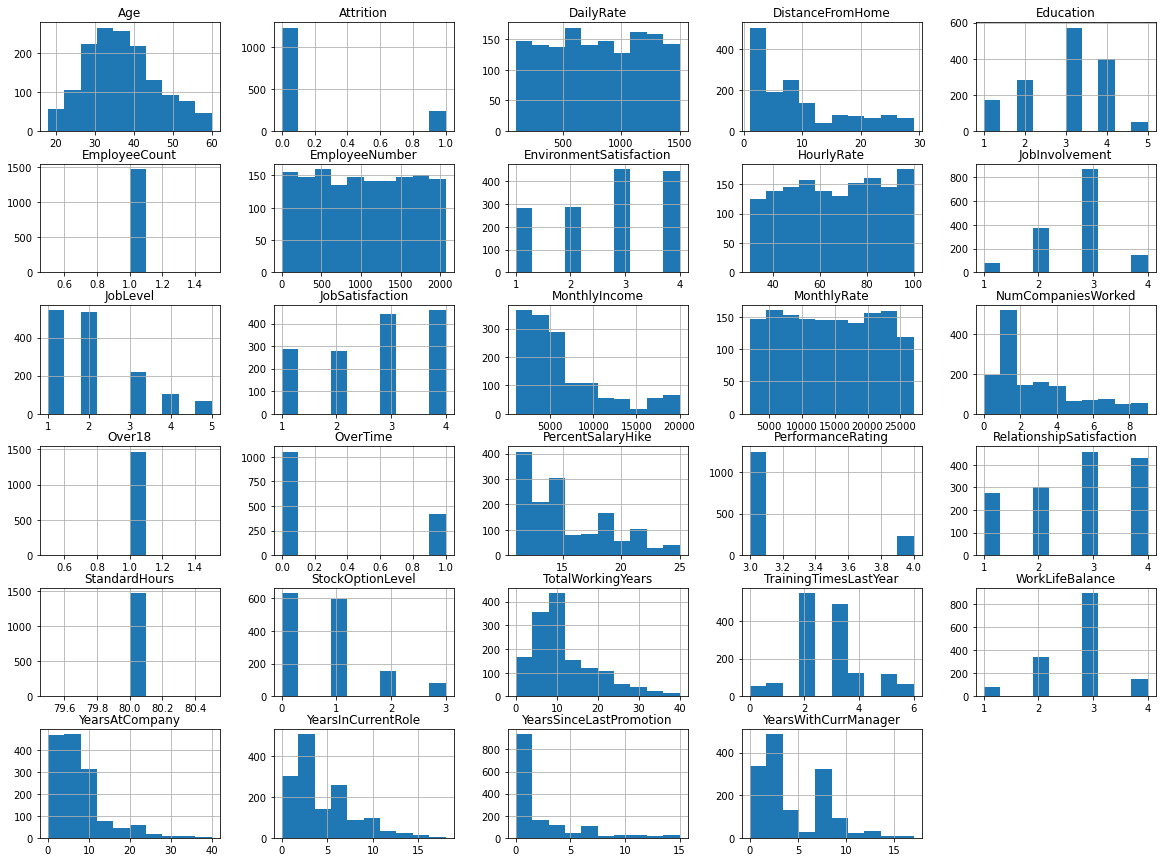

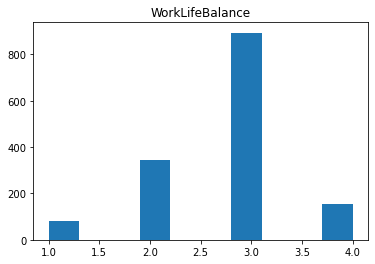

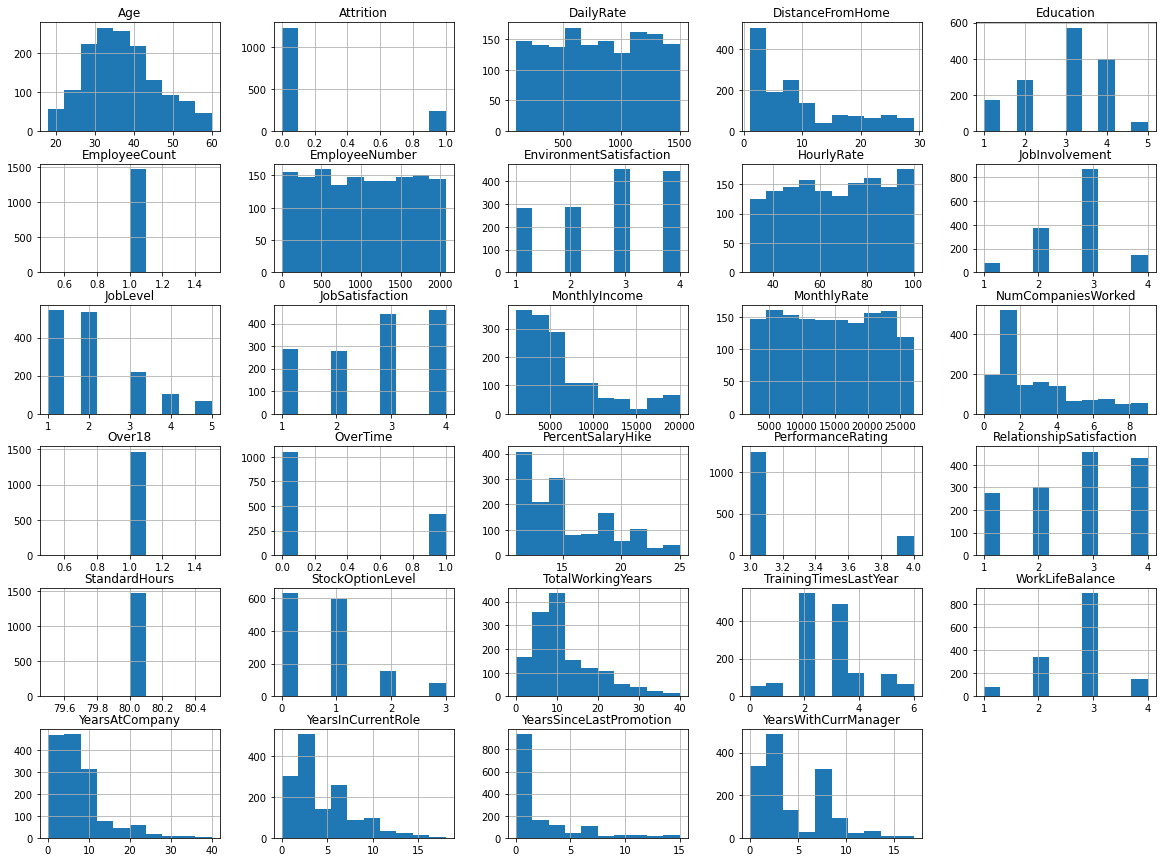

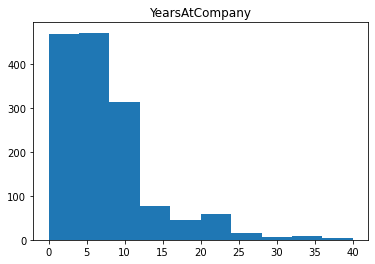

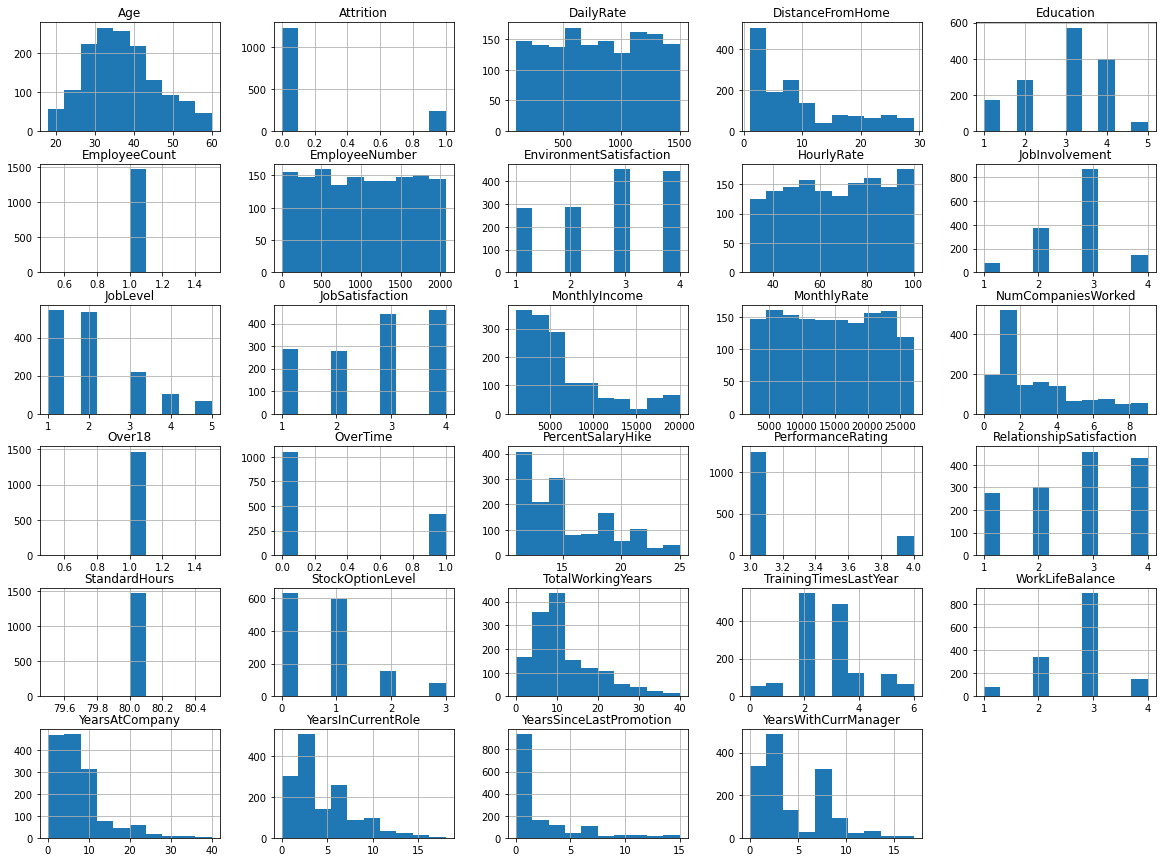

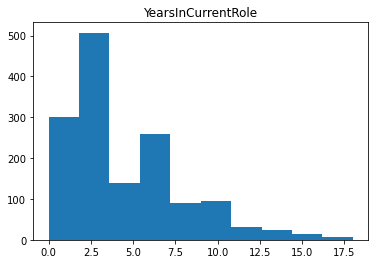

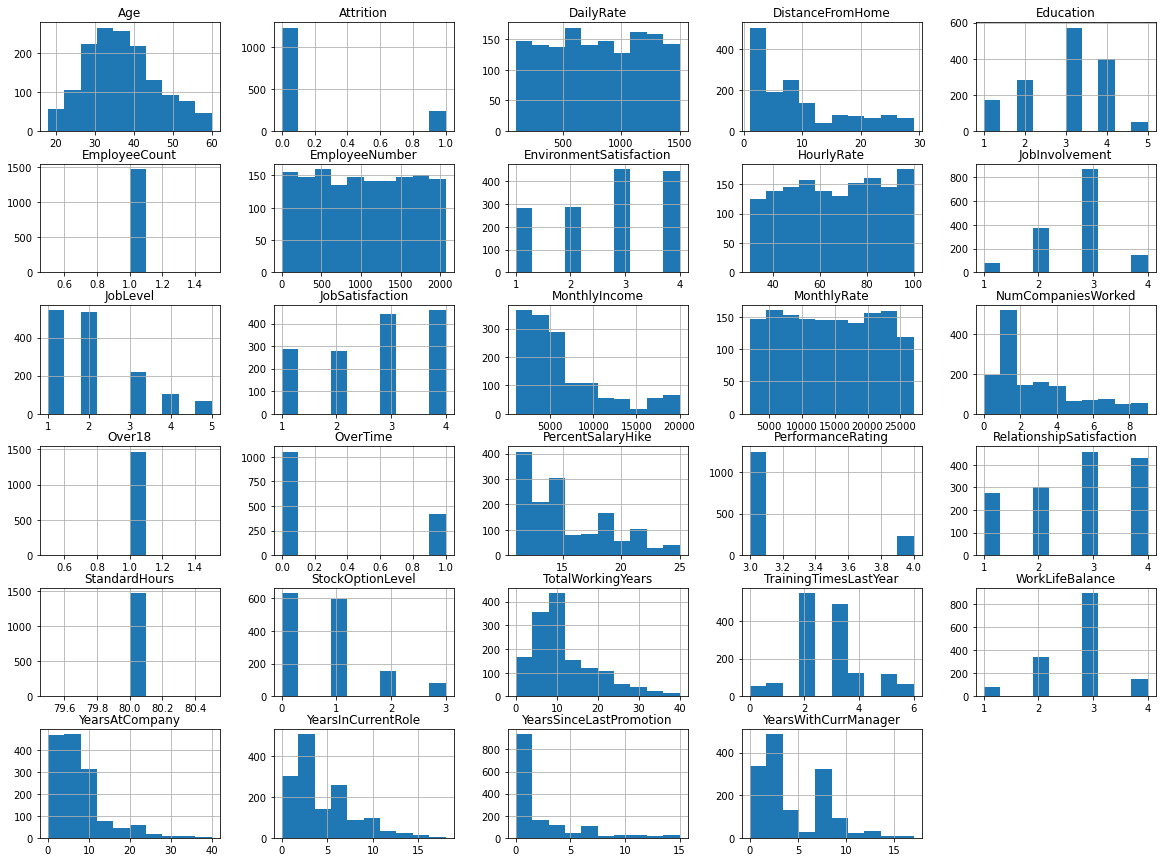

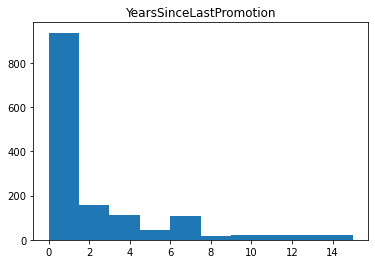

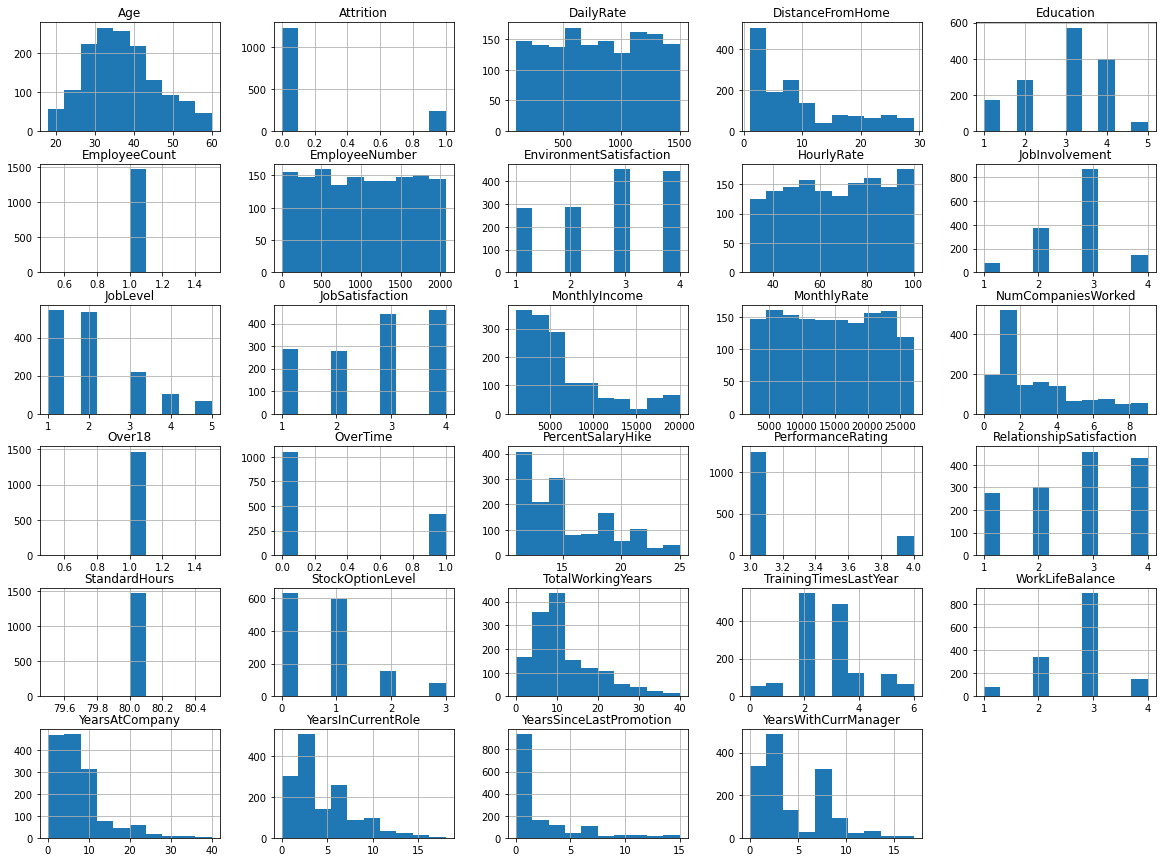

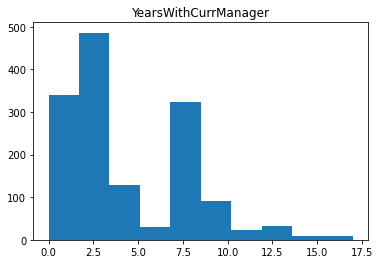

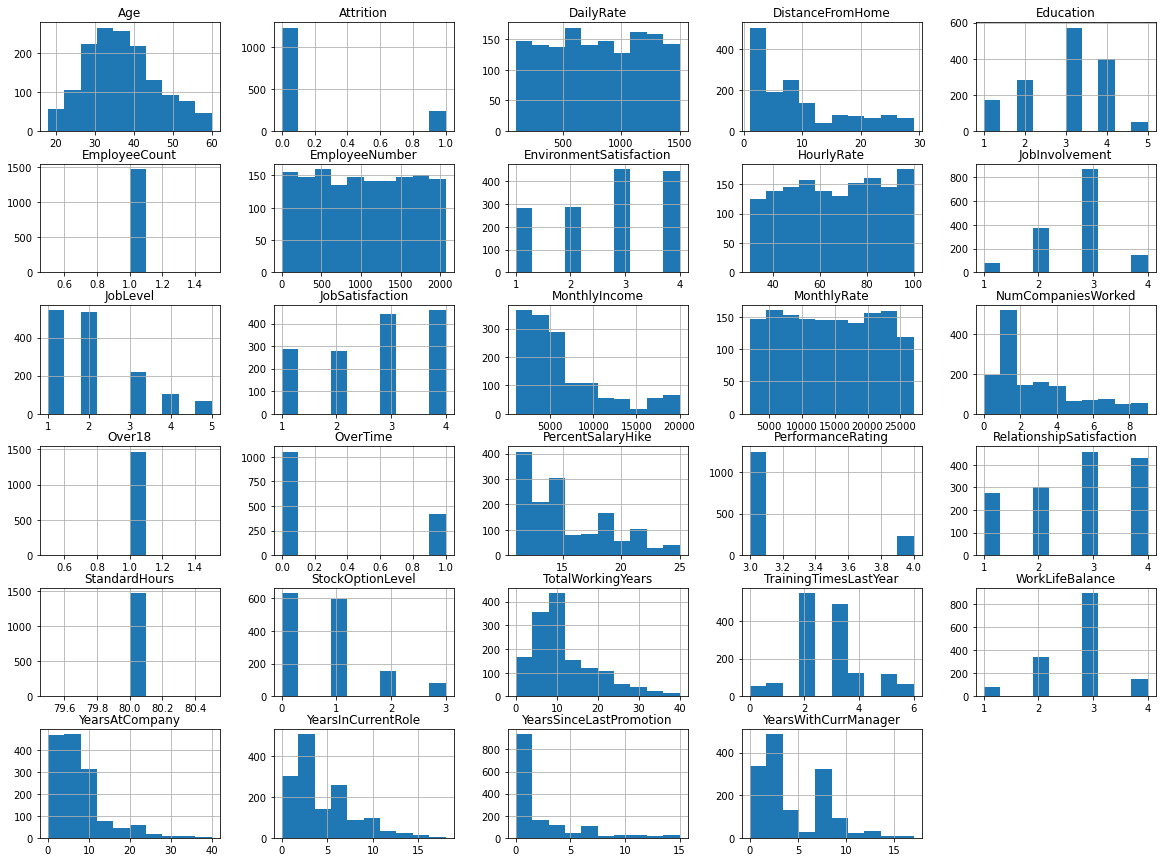

In [258]:
# histograms of the whole dataframe 
for columns in df.columns:
    plt.hist(df[columns])
    plt.title(columns)
    df.hist(figsize=(20,15))
    plt.show()

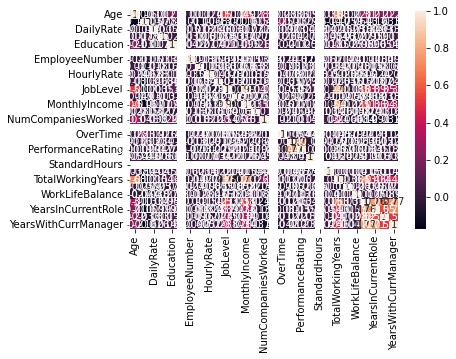

In [259]:
# to check the correlation and its heatmap

corr = df.corr()

sns.heatmap(corr, annot=True)

plt.show()

In [260]:
print(corr.Attrition)

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
Y

In [261]:
# dropping the suitable ones

df_code = df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

In [262]:
df_code.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [263]:
# SCALING
from sklearn.preprocessing import MinMaxScaler
df_code = pd.get_dummies(df_code)

scaler = MinMaxScaler()
scaler.fit(df_code)
scaled_data = scaler.transform(df_code)
scaled_df = pd.DataFrame(scaled_data, columns=df_code.columns)

In [264]:
Y = scaled_df['Attrition'].values
X = scaled_df.drop(['Attrition'], axis = 1)

In [265]:
valX = X.values

In [266]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(valX, Y, test_size=0.25, random_state=40)

In [293]:
# MODELLING
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)

RandomForestRegressor()

In [294]:
# MSE check
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predrf)
print(f"Mean squared error rf: {mse:.6f}")
mse = mean_squared_error(y_test, y_predlr)
print(f"Mean squared error lr: {mse:.6f}")

Mean squared error rf: 0.110520
Mean squared error lr: 0.105521


In [291]:
from sklearn.metrics import classification_report

y_predRF = modelRF.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.33


In [292]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train) 
y_predLR = modelLR.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predLR))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.32


### y is continuous -> regression = Linear Regression, Random Forest, KN, SVC etc. 
y is categorical -> classification = Logistic Regression, Random Forest, KNN, SVM etc.


CONFUSION MATRIX

PREDICTION 1, ACTUAL 1 = TRUE POSITIVE
PREDICTION 0, ACTUAL 0 = TRUE NEGATIVE
PREDICTION 1, ACTUAL 0 = FALSE POSITIVE
PREDICTION 0, ACTUAL 1 = FALSE NEGATIVE

accuracy = TP + TN / TP + TN + FN + FP
precision = TP / TP + FP
recall = TP / TP + FN